<h1>How to Predict the Survival of Titanic Passengers<br>
    <span style='font-weight: medium; font-size:1.5rem; line-height: 1.25'>Analyzing data and identifying the best classification algorithm</span>
</h1>
Author: <a href="https://sthakur.work">Shambhavi Thakur</a>

## Introduction

The [data](https://www.kaggle.com/c/titanic/data) for this project comprises a training and a testing dataset. I have added these datasets into the notebook environment.

## Project objectives

- Explore the data.

- Clean the data.

- Build a model that can predict whether the passengers listed in the testing dataset survived or&nbsp;not.

## Implementation seps

1. Convert the datasets into pandas dataframes.
  
2. View basic details about the&nbsp;data.

3. Identify and remove outliers.

4. Combine the datasets.

5. Find relationships and fill missing values.

6. Perform feature engineering, imputing additional missing values.

7. Use a combination of algorithms to build a predictor model.

8. Apply a different preprocessing strategy and determine its effect on model accuracy.

## Step 1: Converting the datasets

In [1]:
import pandas as pd

df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [2]:
# Saving passenger IDs in a new dataframe

output = pd.DataFrame(df_test.PassengerId)

## Step 2: Viewing basic details about the&nbsp;data

In [3]:
# Viewing the first few rows of the datasets

df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In the datasets, Survived, Pclass, and Embarked are categorical variables. In addition, Survived is the target variable.

In [5]:
# Checking for duplicates

print('Total duplicates in the training data: ', len(df_train[df_train.duplicated('PassengerId')]))
print('Total duplicates in the testing data: ', len(df_test[df_test.duplicated('PassengerId')]))

Total duplicates in the training data:  0
Total duplicates in the testing data:  0


In [6]:
# Determining total null values in the datasets

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Viewing summarized structures

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The Age, Cabin, and Embarked columns of the training dataset have null values. In the case of the testing dataset, some of the values in the Age, Fare, and Cabin columns are missing. We will fill out or delete these columns later.

For now, let us also look at descriptive statistics about the datasets.

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The youngest person in the training dataset was 0.42 years old and the oldest person was 80. The minimum fare was 0, the maximum fare was 512.33 approx., and the average fare was 32.2 approx.

Further, the means of the SibSp and Parch columns indicate that approximately 52.3% of the passengers had siblings or spouses on board and 38.16% of the passengers had parents or children on board. And as per the mean of the Survived column, approximately 38% of all the passengers on board survived.

In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In the testing dataset, the youngest person was 0.17 years old and the oldest person was 76. In addition, the minimum fare was 0, the maximum fare was 512.33 approx., and the average fare was 35.63 approx. Also, approximately 44.7% of the passengers had siblings or spouses on board and 39.2% of the passengers had parents or children on board.

What about descriptive statistics for the nominal values?

In [12]:
import numpy as np

df_train.describe(include=[np.object])                          

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Smith, Mr. Richard William",male,1601,B96 B98,S
freq,1,577,7,4,644


In [13]:
df_test.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Oliva y Ocana, Dona. Fermina",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


Apparently, males outnumbered females on the Titanic. In addition, most of the cabins listed in the datasets were on the B deck and the most common embarkment port&nbsp;was&nbsp;S.

Next, let us look at a few specific stats about the&nbsp;data.

What were the most common ages, grouped by class and then gender?

In [14]:
df_train.groupby(['Pclass', 'Sex']).Age.apply(lambda x: x.mode()[0])

Pclass  Sex   
1       female    35.0
        male      36.0
2       female    24.0
        male      23.0
3       female    18.0
        male      22.0
Name: Age, dtype: float64

What was the most common fare within each class?

In [15]:
df_train.groupby('Pclass').Fare.apply(lambda x: x.mode()[0])

Pclass
1    26.55
2    13.00
3     8.05
Name: Fare, dtype: float64

In [16]:
# Extracting the most common cabin(s) per class
df_train.groupby('Pclass').Cabin.apply(lambda x: x.mode()[0])

Pclass
1    B96 B98
2          D
3         G6
Name: Cabin, dtype: object

In [17]:
df_test.groupby('Pclass').Cabin.apply(lambda x: x.mode()[0])

Pclass
1    B57 B59 B63 B66
2                 F4
3              F E46
Name: Cabin, dtype: object

In [18]:
# Extracting all unique embarkment points
[x for x in df_train.Embarked.unique() if pd.notna(x)]

['S', 'C', 'Q']

In [19]:
# Extracting the most common embarkment point per class
df_train.groupby('Pclass').Embarked.apply(lambda x: x.mode()[0])

Pclass
1    S
2    S
3    S
Name: Embarked, dtype: object

In [20]:
df_test.groupby('Pclass').Embarked.apply(lambda x: x.mode()[0])

Pclass
1    C
2    S
3    S
Name: Embarked, dtype: object

In [21]:
# Obtaining the number of people who boarded from each embarkment point
df_train.groupby('Pclass').Embarked.value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [22]:
df_test.groupby('Pclass').Embarked.value_counts()

Pclass  Embarked
1       C            56
        S            50
        Q             1
2       S            78
        C            11
        Q             4
3       S           142
        Q            41
        C            35
Name: Embarked, dtype: int64

A large proportion of Pclass 1 passengers preferred the C embankment point, but C was the least preferred among Pclass 3 passengers.

In [23]:
# Viewing the mean, median, and standard deviation of Age and Fare, grouped by Pclass (passenger class)

(df_train.groupby('Pclass')\
 .agg({'Age': ['mean', 'median', 'std'], 'Fare': ['mean', 'median', 'std']}))

Age                         Fare                    
             mean median        std       mean   median        std
Pclass                                                            
1       38.233441   37.0  14.802856  84.154687  60.2875  78.380373
2       29.877630   29.0  14.001077  20.662183  14.2500  13.417399
3       25.140620   24.0  12.495398  13.675550   8.0500  11.778142

There are significant variations in the ages and fares of the datasets. Are there any outliers in the training dataset? If there are, we will have to remove them. We will let the testing dataset&nbsp;be.

## Step 3: Identifying and removing outliers

In [24]:
# Preparing to draw graphs
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('Paired', 9)
sns.set_context('notebook', rc={'figure.figsize':(7,6),\
                                              "lines.linewidth": 2.5})
# Writing a reusble function to set graph labels
def set_generic_labels(ax_n, size=16.5, xlabel='Pclass', ylabel='Survivor percent',\
               title=''):
    plt.rcParams['axes.titlesize'] = size
    _ = ax_n.set(xlabel=xlabel, ylabel = ylabel,\
           title=title)
    
# Writing a function to increase the sizes of xtick labels
def enhance_xtick_labels(ax_n, size=14):
    for ax_n in plt.gcf().axes:
        l = ax_n.get_xticklabels()
        ax_n.set_xticklabels(l, fontsize=size)

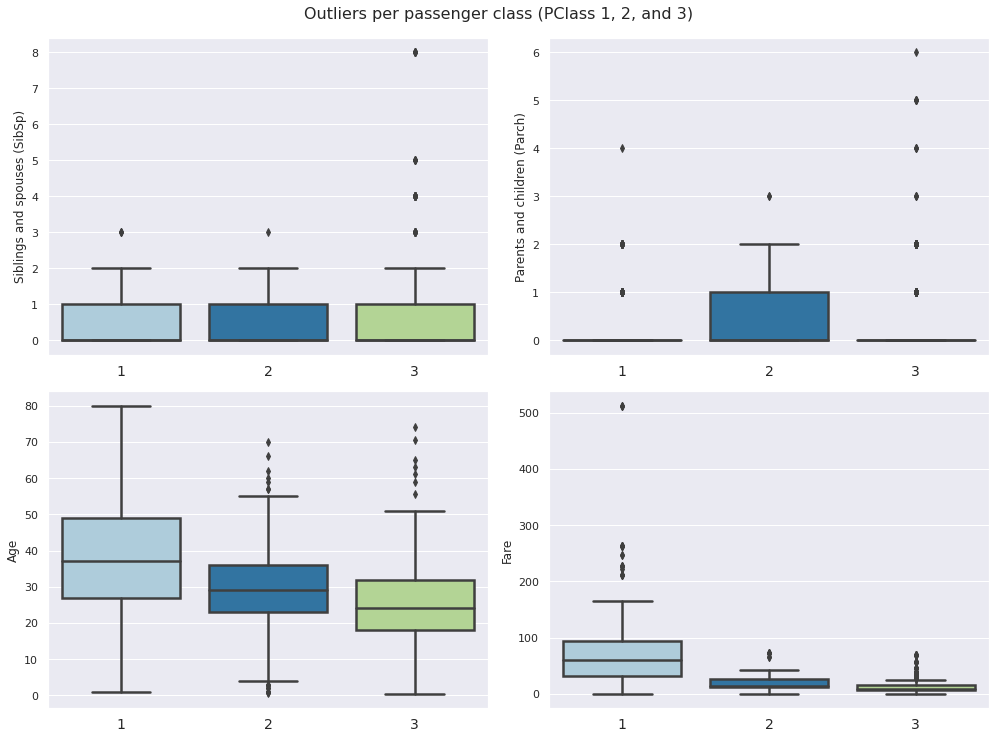

In [25]:
# Drawing boxplots to identify outliers

# Selecting the numerical variables that might contain outliers
selected_features = ["SibSp", "Parch", "Age", "Fare"]

# Setting other constants
x ="Pclass"
ylabels = ['Siblings and spouses (SibSp)',\
           'Parents and children (Parch)', 'Age', 'Fare']

fig, ax = plt.subplots(2, 2, figsize=(14,10))
for feature, ylabel, subplot in zip(selected_features, ylabels, ax.flatten()):
    ax_n = sns.boxplot(x=x, y=feature, data=df_train, ax=subplot)
    set_generic_labels(ax_n, xlabel='', ylabel=ylabel, title='')
    enhance_xtick_labels(ax_n)

plt.suptitle('Outliers per passenger class (PClass 1, 2, and 3)',\
             size=16, y=1.025)
plt.tight_layout()

There are quite a few outliers in the datasets.

Let us identify the rows in the training dataset that contain more than two outliers and remove the rows. We will use a function saved in the util_outlier_finder.py file to identify the rows. This function is from the [Titanic Top 4% with ensemble modeling](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling) notebook.

In [26]:
# importing the util file
import util_outlier_finder as util_f

# Selecting numerical variables that contain outliers
selected_features = ["SibSp", "Parch", "Age", "Fare"]

In [27]:
# Identifying rows that have outliers in three or more of
# the following columns: Age, SibSp, Parch, and Fare
outliers_to_drop = util_f.identify_outliers(df_train, 2, selected_features)

In [28]:
len(outliers_to_drop)

11

In [29]:
df_train.loc[outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In some of the identified rows, the fare is conspicuously high. There are also instances where family size and age are different from the norm for this dataset. Let us delete these rows.

In [30]:
df_train = df_train.drop(outliers_to_drop, axis=0).reset_index(drop=True)

In [31]:
# Listng the outlier-containing rows
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  880 non-null    int64  
 1   Survived     880 non-null    int64  
 2   Pclass       880 non-null    int64  
 3   Name         880 non-null    object 
 4   Sex          880 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        880 non-null    int64  
 7   Parch        880 non-null    int64  
 8   Ticket       880 non-null    object 
 9   Fare         880 non-null    float64
 10  Cabin        200 non-null    object 
 11  Embarked     878 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.6+ KB


## Step 4: Combining the datasets

Our earlier explorations had revealed that there are no dramatic differences between the training and testing datasets. Let us combine these datasets so that it will be easier for us to fill values into features and add or remove features. We will split the combined dataset back into training and testing data once we are ready to build the predictor model.

In [32]:
# Saving the length of df_train so as to easily split the combined dataset later
len_train = len(df_train)

In [33]:
# Concatenating the datasets
df =  pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [34]:
df.shape

(1298, 12)

In [35]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

Next, let us find relationships between the various features of the data and fill missing values, as required.

## Step 5: Finding relationships and filling missing&nbsp;values

How does the target variable, Survived, correlate with the features that we had selected earlier in this project?

In [36]:
corr_cols = selected_features.copy()
corr_cols.insert(0, 'Survived')

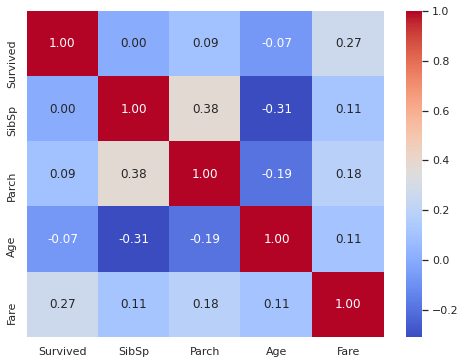

In [37]:
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.heatmap(df_train[corr_cols].corr(), annot=True,\
            fmt = ".2f", cmap = "coolwarm", ax=ax);

Among the selected features, only Fare seems to have a significant correlation with the target variable, Survived. The higher the fare, the higher the probability of survival.

How is fare distributed in the data? We will use the combined dataset to answer this question. One fare value is missing in the dataset, so we will impute it first.

In [38]:
# Retrieving the row where the fare is missing

df[df.Fare.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1032,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


The following code indicates that fares vary by gender within each class.

In [39]:
(df.groupby(['Pclass', 'Sex'])\
 .agg({'Fare': ['mean', 'median', 'std']}))

Fare                    
                     mean   median        std
Pclass Sex                                   
1      female  107.249179  80.0000  81.413770
       male     68.791079  47.1000  73.054894
2      female   23.234827  23.0000  11.239817
       male     19.904946  13.0000  14.775149
3      female   14.560507  10.4625   9.934374
       male     11.947146   7.8958  10.041635

So, we will fill the missing fare based on the median fare, grouped by Pclass and gender.

In [40]:
df["Fare"] = df.groupby(['Pclass', 'Sex'])['Fare'].apply(lambda x: x.fillna(x.median()))

Now the dataset does not have missing fares.

In [41]:
df[df.index==1032]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1032,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.8958,NaN,S


Now, let us look at the distribution of fares.

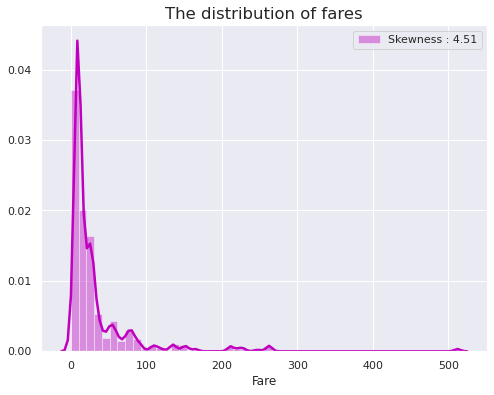

In [42]:
fig, ax = plt.subplots(figsize=(8, 6)) 

g = sns.distplot(df.Fare, color='m', label="Skewness : %.2f"%(df.Fare.skew()), ax=ax)
g.legend(loc="best")

set_generic_labels(g, xlabel='Fare', ylabel='',\
                   title='The distribution of fares')

The distribution is skewed. This indicates that the fares in our dataset are not uniform. To uniformize the fares, let us apply a logarithmic function, log1p, to them. The logarithmic function will create a new scale for the fares. The fares will be distributed more evenly across this scale.

In [43]:
 df['Fare_uniform'] = np.log1p(df.Fare)

Now, let us plot the distribution of fares again.

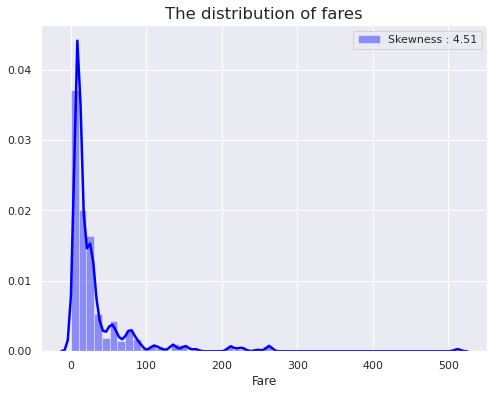

In [44]:
fig, ax = plt.subplots(figsize=(8, 6)) 

g = sns.distplot(df.Fare, color='b', label="Skewness : %.2f"%(df.Fare.skew()), ax=ax)
g.legend(loc="best")

set_generic_labels(g, xlabel='Fare', ylabel='',\
                   title='The distribution of fares')

Next, let us try to find any other significant relationships among all the features of the training or combined dataset. We will begin by exploring the relationship between passenger class and the probability of survival. Then, we will look at the interrelations between some of the other factors, such as gender, age, the number of relatives, and embarkment port, and the chance of survival.

### Passenger class

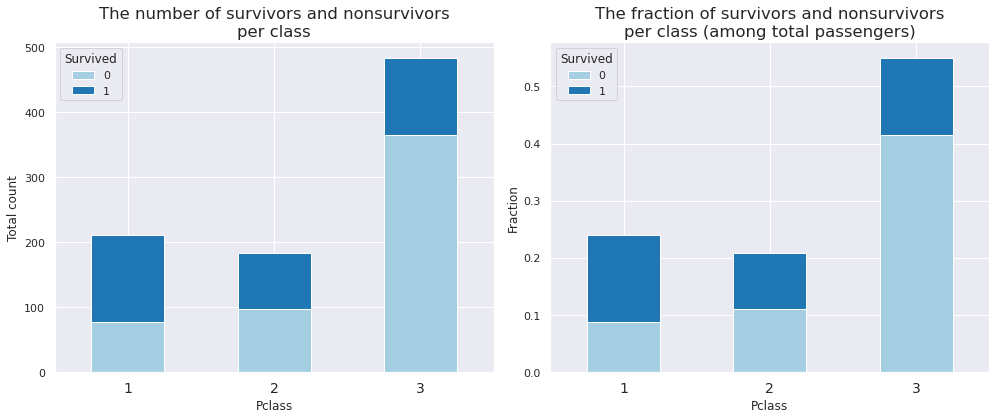

In [45]:
'''Graphing the following details:
   - The number of survivors and nonsurvivors per class
   - The fraction of survivors and nonsurvivors of each class among the total passengers
'''

cols = ['PassengerId', 'Pclass', 'Survived']
total_passengers = len(df_train)
funcs = ['count', lambda x: x.count()/total_passengers]
ylabels = ['Total count', 'Fraction']
titles = ['The number of survivors and nonsurvivors\nper class',\
          'The fraction of survivors and nonsurvivors\nper class (among total passengers)']

fig, ax = plt.subplots(1, 2, figsize=(14,6))
for func, ylabel, title, subplot in zip(funcs, ylabels, titles, ax.flatten()):
    ax_n = df_train.pivot_table(*cols, func).plot\
    (kind='bar', stacked=True, rot=0, ax=subplot)
    set_generic_labels(ax_n, ylabel=ylabel, title=title)
    enhance_xtick_labels(ax_n)
plt.tight_layout()

So, Pclass 1 had the largest number of survivors as well as the largest fraction of survivors among the total passengers. It was followed by Pclass 3.

Here's another plot that depicts the probability of survival of the passengers within each class:

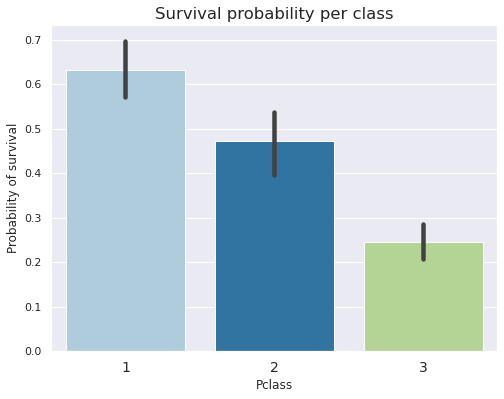

In [46]:
fig, ax = plt.subplots(figsize=(8, 6)) 

g = sns.barplot(x="Pclass", y="Survived", data=df_train, ax=ax)

set_generic_labels(g, ylabel='Probability of survival',\
                   title='Survival probability per class')
enhance_xtick_labels(g)

When it came to the probability of survival of the total passengers within each class, Pclass 2 was ahead of Pclass 3. This is because Pclass 2 had far fewer people to begin with than Pclass 3 as well as Pclass&nbsp;1.

Let us look at the interrelations between gender and survival&nbsp;next.

### Gender

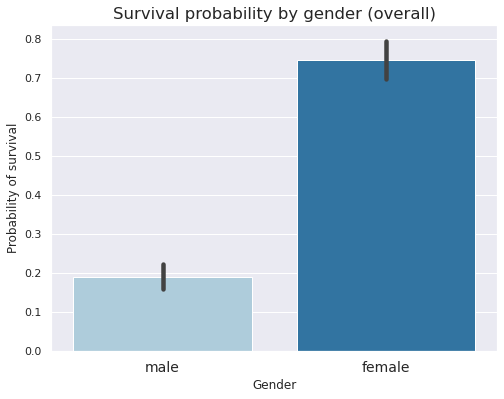

In [47]:
# Depicting survival probability by gender, overall

fig, ax = plt.subplots(figsize=(8, 6)) 

g = sns.barplot(x="Sex", y="Survived", data=df_train, ax=ax)

set_generic_labels(g, xlabel='Gender', ylabel='Probability of survival',\
                   title='Survival probability by gender (overall)')
enhance_xtick_labels(g)

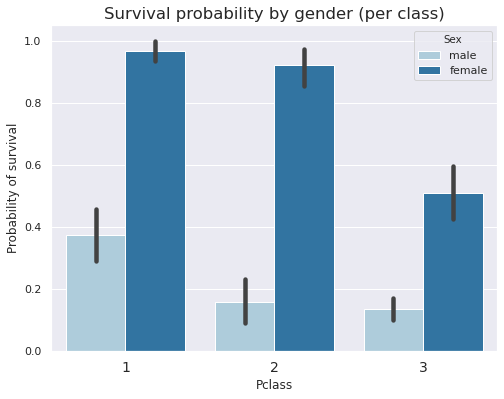

In [48]:
# Depicting survival probability by gender, per class

fig, ax = plt.subplots(figsize=(8, 6)) 

g = sns.barplot(x="Pclass", y="Survived", hue="Sex",\
                data=df_train, ax=ax)

set_generic_labels(g, ylabel='Probability of survival',\
                   title='Survival probability by gender (per class)')
enhance_xtick_labels(g)

So, females in each passenger class had a much better chance of survival than males. This could be because the females got preferential access to lifeboats.

Next, let us find out how age influenced the probability of survival.

### Age

What was the distribution of age among survivors and nonsurvivors?

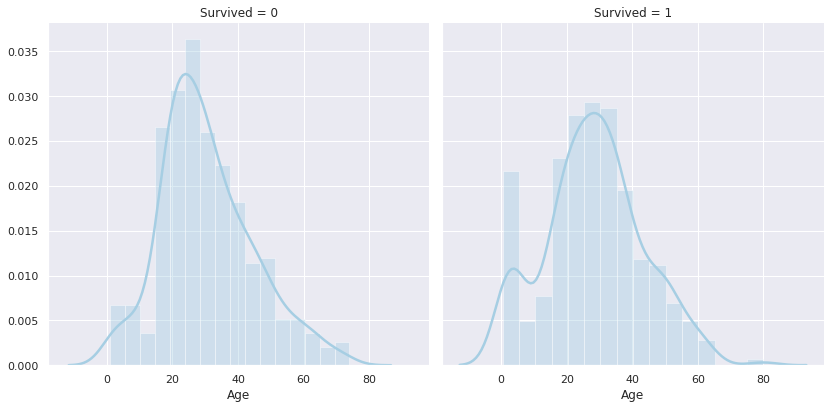

In [49]:
# Depicting the distribution of age among survivors and nonsurvivors

g = sns.FacetGrid(df_train, col='Survived', height=5.85, aspect=1)
g = g.map(sns.distplot, "Age")

The age distributions indicate that people in the 20–40 age group had a better chance of survival than people in the 60–80 age group. The 0–5 age group also had a considerably higher chance of survival than the 60-80 age group.

The following kernel density estimation plot also shows peaks for the 0–5 and 20-40 age groups.

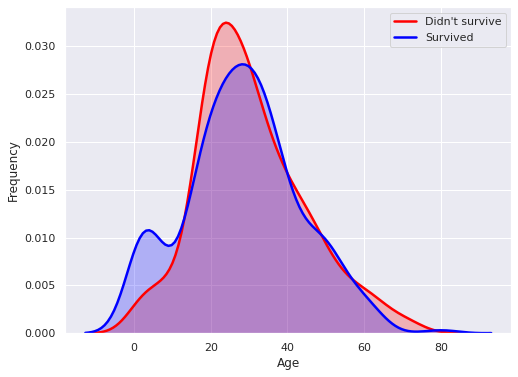

In [50]:
fig, ax = plt.subplots(figsize=(8, 6)) 

g = sns.kdeplot(df_train["Age"][(df_train["Survived"] == 0) & (df_train["Age"].notnull())],\
                color="Red", shade = True, ax=ax)
g = sns.kdeplot(df_train["Age"][(df_train["Survived"] == 1) & (df_train["Age"].notnull())],\
                color="Blue", shade= True, ax=ax)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Didn't survive","Survived"])


There is definitely a relationship between age groups and chance of survival. Let us explore this relationship further.

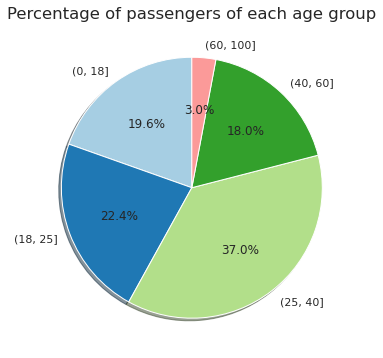

In [51]:
# Drawing a pie chart to depict the percentage of passengers in the
# age groups 0–18, 18–25, 25–40, 40–60, 60–100

# Listing the ages in the upper and lower limits of the proposed age groups
age_groups = [0, 18, 25, 40, 60, 100]

# Creating a new dataframe where null rows of the Age column have been removed
df_temp = df_train[np.isfinite(df_train.Age)].copy()

# Adding a column of age groups
df_temp['AgeGroup'] = pd.cut(df_temp.Age, bins=age_groups)

# Calculating the number of survivors based on age groups
total_survivors_per_group = df_temp.groupby('AgeGroup').Survived.agg(sum)

# Calculating the total number of passengers in each age group
total_passengers_per_group = df_temp.groupby('AgeGroup').Survived.agg('count')

# Plotting a pie chart of the total number of passengers in each age group
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(total_passengers_per_group, labels=total_passengers_per_group.index.values.tolist(),\
        autopct='%1.1f%%', shadow=True, startangle=90);

set_generic_labels(ax, xlabel='', ylabel='',\
               title='Percentage of passengers of each age group')

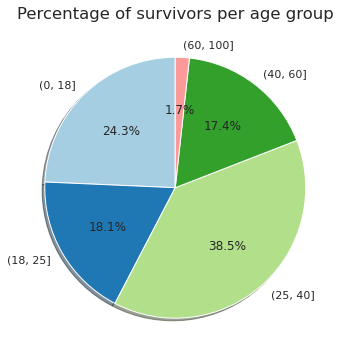

In [52]:
# Depicting the percentage of survivors in each age group
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(total_survivors_per_group, labels=total_survivors_per_group.index.values.tolist(),
     autopct='%1.1f%%', shadow=True, startangle=90);

set_generic_labels(ax, xlabel='', ylabel='',\
               title='Percentage of survivors per age group')

As the pie charts indicate, the 25–40 age group had the highest percentage of passengers, followed by the 18–25 group. When it came to survival, the 25–40 age group again had the highest percentage. But the 0–18 group took the second spot in this&nbsp;slot. This could be because women with children (0–18 age group) were given preferential access to lifeboats and most of those women were in the 25–40 age group. Let us corroborate this idea using a&nbsp;graph.

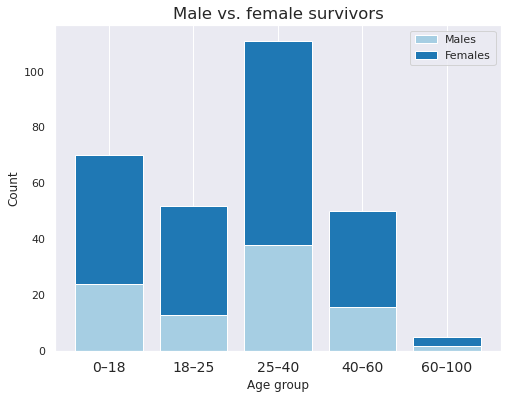

In [53]:
x_vals = ['0–18', '18–25', '25–40', '40–60', '60–100']

male_survivors = np.asarray(df_temp[df_temp.Sex == 'male'].\
                            groupby('AgeGroup').Survived.agg(sum))
female_survivors = np.asarray(df_temp[df_temp.Sex == 'female'].\
                              groupby('AgeGroup').Survived.agg(sum))

plt.figure(figsize=(8,6))

# Creating a stacked bar chart
plt.bar(x_vals, male_survivors, label='Males')
plt.bar(x_vals,female_survivors, bottom=male_survivors, label='Females')

ax = plt.gca()
ax.yaxis.grid()
plt.legend()
plt.xticks(np.arange(len(x_vals)))
ax.set_xticklabels(x_vals)

enhance_xtick_labels(ax)

set_generic_labels(ax, xlabel='Age group', ylabel='Count',\
               title='Male vs. female survivors')

Yes, the 25–40 age group had the largest number of rescued women.

Next, let us look at how the number of relatives impacted the chance of survival.

### The number of relatives

What was the chance of survival of the people who were traveling with their siblings and spouses?

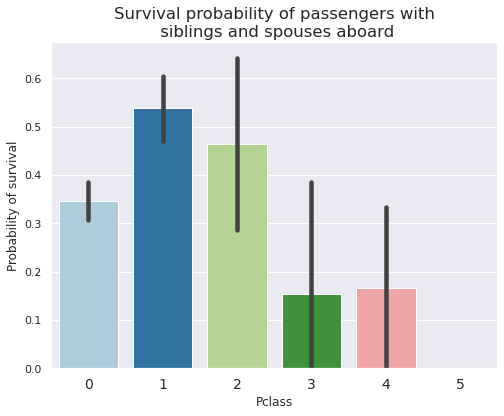

In [54]:
fig, ax = plt.subplots(figsize=(8, 6)) 

g  = sns.barplot(x="SibSp", y="Survived", data=df_train, ax=ax)

ylabel = 'Probability of survival'
title = 'Survival probability of passengers with\n siblings and spouses aboard'

set_generic_labels(g, ylabel=ylabel, title=title)
enhance_xtick_labels(g)

Apparently, people who weren't traveling with any siblings or spouses (SibSp) and people with a maximum of two SibSp aboard had a much better chance of survival than people with three or more SibSp aboard.

What was the survival probability of the people who were traveling with their parents and children?

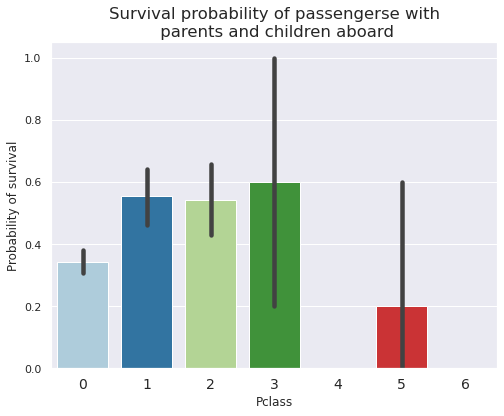

In [55]:
fig, ax = plt.subplots(figsize=(8, 6)) 

g  = sns.barplot(x="Parch", y="Survived", data=df_train, ax=ax)

ylabel = 'Probability of survival'
title = 'Survival probability of passengerse with\n parents and children aboard'

set_generic_labels(g, ylabel=ylabel, title=title)
enhance_xtick_labels(g)

In this case also, passengers with none, one, or two parents and children (Parch) on board had a better chance survival than those with more Parch aboard. A Parch value of 3 also indicates a greater chance of survival, but this might be misleading because the training dataset has only five rows where Parch equals 3.

Next, let us find out any association between the number of relatives on board and passenger class. We will try to answer the following questions:

- Within each class, how many people who had relatives on board survived?

- How many people in each class had relatives on board and didn't survive?

In [56]:
# Determining the total number of people per class who had relatives on board 
# and either survived or didn't

survivors_fam_per_class = df_train[((df_train.SibSp > 0) | (df_train.Parch > 0)) &\
                         (df_train.Survived == 1)].groupby('Pclass').Survived.agg('count')
non_survivors_fam_per_class = df_train[((df_train.SibSp > 0) | (df_train.Parch > 0)) &\
                         (df_train.Survived == 0)].groupby('Pclass').Survived.agg('count')

total_passengers_per_class = df_train.groupby('Pclass').PassengerId.count()

survivors_fam_percent_per_class = (survivors_fam_per_class/\
                                       total_passengers_per_class) * 100
non_survivors_fam_percent_per_class = (non_survivors_fam_per_class/\
                                       total_passengers_per_class) * 100

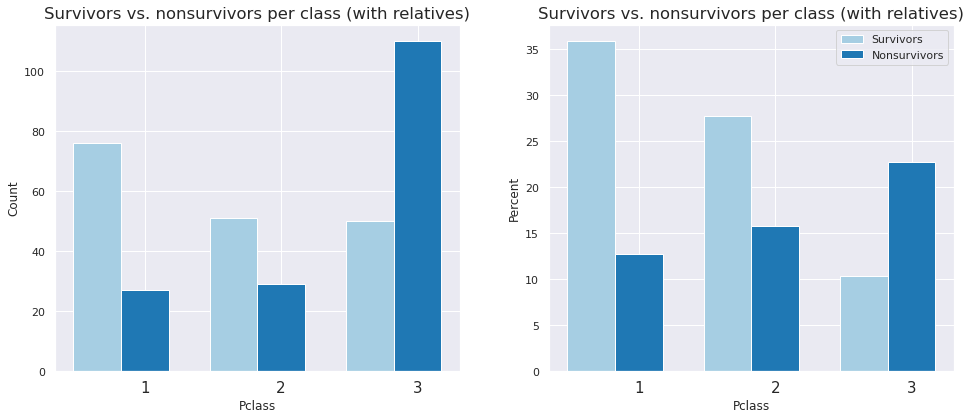

In [57]:
# Depicting the numbers and percentages of survivors and nonsurvivors per class

ylabels = ['Count', 'Percent']
data_list = [[survivors_fam_per_class, non_survivors_fam_per_class],\
             [survivors_fam_percent_per_class, non_survivors_fam_percent_per_class]]
titles = ['Survivors vs. nonsurvivors per class (with relatives)',\
          'Survivors vs. nonsurvivors per class (with relatives)'
         ]

bar_width = 0.35
idx = np.arange(survivors_fam_per_class.count())
marks = survivors_fam_per_class.index.values.tolist()

fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes = axes.ravel()

for i, ax in enumerate(axes):
    rect1 = ax.bar(idx, data_list[i][0], bar_width, label='Survivors')
    rect2 = ax.bar(idx + bar_width, data_list[i][1], bar_width, label='Nonsurvivors')

    set_generic_labels(ax, ylabel=ylabels[i], title=titles[i])

    x_tick_marks = marks
    ax.set_xticks(idx + bar_width)
    x_tick_names = ax.set_xticklabels(x_tick_marks, fontsize=15)
    
    plt.legend()
    
plt.tight_layout()

In [58]:
# Adding a new column that lists the total number of siblings, spouses, parents, and children per passenger
# Adding the column to the testing dataframe as well for consistency
df_train.insert(8, 'Relatives', df_train[["SibSp", "Parch"]].sum(axis=1))

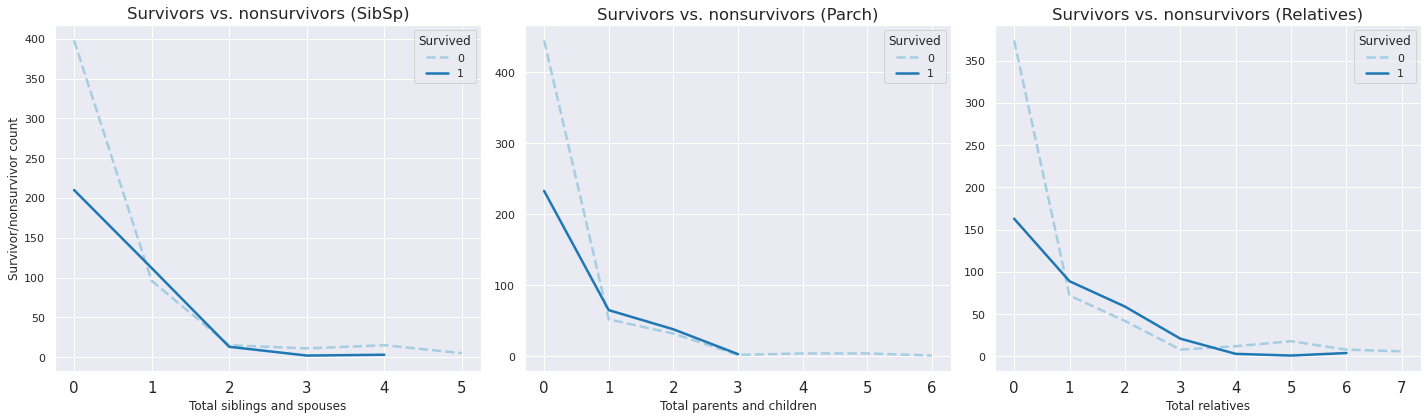

In [59]:
# Depicting the counts of survivors and nonsurvivors by
# SibSp (sibling-spouse), Parch (parents-children), and Relatives
func = 'count'
cols = [['PassengerId', ['SibSp'], 'Survived'],\
        ['PassengerId', ['Parch'], 'Survived'], \
        ['PassengerId', ['Relatives'], 'Survived'],]

ylabels = ['Survivor/nonsurvivor count', '', '']
styles = ['--','-']
xlabels = ['Total siblings and spouses',\
           'Total parents and children',\
           'Total relatives']
titles = ['Survivors vs. nonsurvivors (SibSp)',\
          'Survivors vs. nonsurvivors (Parch)',\
          'Survivors vs. nonsurvivors (Relatives)']
      
fig, ax = plt.subplots(1, 3, figsize=(20,6))

for elem, xlabel, ylabel, title, subplot in zip(cols, xlabels, ylabels, titles, ax.flatten()):
    ax_n = df_train.pivot_table(*elem, func).plot\
    (rot=0, style=styles, ax=subplot)
    ax_n.tick_params(axis='x', labelsize=15)
    set_generic_labels(ax_n, xlabel=xlabel, ylabel=ylabel, title=title)

plt.tight_layout()

The graphs indicate that more passengers with only one or no relative on board survived compared to people with larger families. Also, survivors seemed to have a total of six or fewer relatives.

Among nonsurvivors also, more people with only one or no relative on board perished than people with larger family sizes. But there were also nonsurvivors whose families were much larger (10 relatives) than the maximum count for survivors (6 relatives).

Next, let us find out any interrelations between embarkment port and the probability of survival.

### Embarkment port

The Embarked column, which specifies the embarkment port, has a couple of missing values in the combined dataset. Let us fill out these values&nbsp;first.

Here are the rows that contain the missing values:

In [60]:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_uniform
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,4.394449
820,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,4.394449


The following code shows that the most common embarkment port for Pclass 1 females&nbsp;was&nbsp;C.

In [61]:
df.groupby(['Pclass', 'Sex']).Embarked.apply(lambda x: x.mode()[0])

Pclass  Sex   
1       female    C
        male      S
2       female    S
        male      S
3       female    S
        male      S
Name: Embarked, dtype: object

We will fill the missing values accordingly.

In [62]:
df.Embarked = df.groupby(['Pclass', 'Sex']).Embarked.apply(lambda x: x.fillna(x.mode()[0]))

Next, let us determine survival probability by embarkment port.

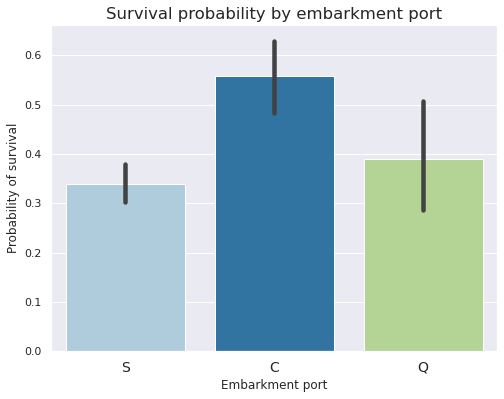

In [63]:
fig, ax = plt.subplots(figsize=(8, 6)) 

g = sns.barplot(x="Embarked", y="Survived", data=df, ax=ax)

set_generic_labels(g, xlabel='Embarkment port', ylabel='Probability of survival',\
                   title='Survival probability by embarkment port')
enhance_xtick_labels(g)

A higher probability of survival is associated with the C port. This is because, among the passengers who boarded from this port, the proportion of Pclass 1 passengers was the highest and considerably so. The following graph corroborates this statement.

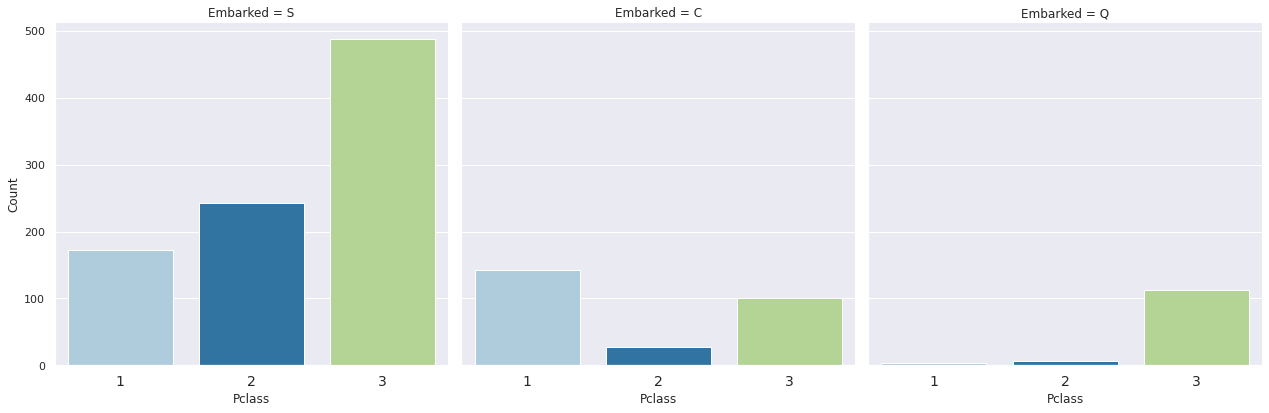

In [64]:
g = sns.catplot("Pclass", col="Embarked",  data=df,\
                height=5.85, aspect=1, kind="count")
g.set_ylabels("Count")

enhance_xtick_labels(g)

Now that we understand the data fairly well and have added a few missing values, let us proceed to the next&nbsp;step.

## Step 6: Performing feature engineering, imputing additional missing values

The Age and Cabin columns of the combined dataset still have values missing. These values were not omitted on purpose. The values are missing because they couldn't be obtained. The missing values reduce rather than enhance the meaning of the dataset.

For example, the Age column can help our model determine the impact of age groups on the survival of passengers. Any missing values in this column can reduce its chance of assessing the impact accurately.

The Cabin column is also relevant. It can help the model decide whether the type of cabin influenced the probability of survival.

We will fill out the missing Age and Cabin columns in this step.

We will also create new columns, modify the values of existing columns, and remove some of the existing columns in this step. In other words, we will perform extensive feature engineering.

Our feature-engineering tasks include the following:

- **Extracting titles from the Name column**: The titles could indicate the socioeconomic status of a passenger and, therefore, help our model detect relevant patterns in the data. 

- **Generting a new column based on SibSp and Parch**: We will combine data from two of the columns, SibSp and Parch, to create a new column that specifies whether a passenger was traveling with their family members or alone. Our model can gain valuable information from this new column.

- **Converting nominal categorical columns into numeric columns**: This step is necessary because the algorithms that we will use to build our model might be unable to use nominal categorical data efficiently.  

Let us begin by extracting titles and saving them in a new column.

In [65]:
#Creating a new column

df['Title'] = df.Name.map(lambda name: name.split(',')[1].split('.')[0].strip())

In [66]:
# Retrieving unique titles

df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'the Countess', 'Jonkheer',
       'Dona'], dtype=object)

There are 18 unique titles in the dataset. Let us reduce this number by cateogring the titles into groups, as defined by the following dictionary.

In [67]:
title_dict = {
    "Mr": "Mr", "Ms": "Mrs", "Mrs": "Mrs","Mme": "Mrs",\
    "Miss": "Miss", "Mlle": "Miss", "Master": "Master",\
    "Don": "Rare", "Dona": "Rare", "Lady": "Rare",\
    "Sir": "Rare", "Jonkheer": "Rare", "the Countess": "Rare",\
    "Dr": "Rare", "Rev": "Rare", "Col": "Rare",\
    "Capt": "Rare","Major": "Rare"
}

In [68]:
# Replacing each title with its corresponding category

df.Title = df.Title.map(title_dict)

In [69]:
# Calculating the number of instances of each type of title

df.Title.value_counts()

Mr        753
Miss      257
Mrs       200
Master     60
Rare       28
Name: Title, dtype: int64

Here is a plot that depicts survival probability by title.

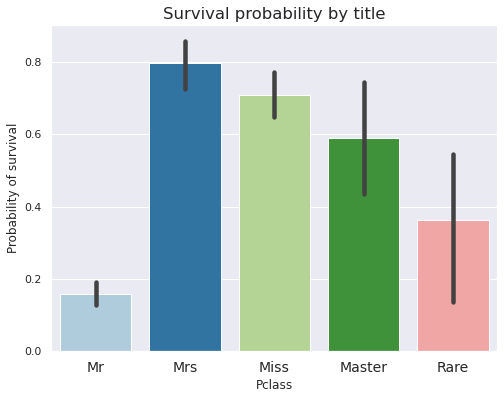

In [70]:
fig, ax = plt.subplots(figsize=(8, 6)) 

g = sns.barplot(x="Title", y="Survived", data=df, ax=ax)

set_generic_labels(g, ylabel='Probability of survival',\
                   title='Survival probability by title')
enhance_xtick_labels(g)

Next, let us look for any significant interrelations between titles, ages, and a few other factors. We will begin by calculating mean and median ages grouped by Pclass, Sex, and Title.

In [71]:
(df.groupby(['Pclass', 'Sex', 'Title'])\
 .agg({'Age': ['mean', 'median']}))

Age       
                           mean median
Pclass Sex    Title                   
1      female Miss    30.355932   30.0
              Mrs     42.926471   45.0
              Rare    42.250000   43.5
       male   Master   6.984000    6.0
              Mr      41.622137   42.0
              Rare    47.615385   49.0
2      female Miss    20.717083   20.0
              Mrs     33.418182   30.0
       male   Master   2.757273    2.0
              Mr      32.346715   30.0
              Rare    40.700000   41.5
3      female Miss    17.360874   18.0
              Mrs     32.326531   31.0
       male   Master   6.090000    6.0
              Mr      28.318910   26.0

Just for the sake of comparison, here are mean and median ages grouped by Pclass and Sex.

In [72]:
(df.groupby(['Pclass', 'Sex'])\
 .agg({'Age': ['mean', 'median']}))

Age       
                    mean median
Pclass Sex                     
1      female  37.244275   36.0
       male    40.982685   42.0
2      female  27.499223   28.0
       male    30.815380   29.5
3      female  22.185329   22.0
       male    25.962264   25.0

As the calculations indicate, if we group the passengers of each gender by title, we get a varied range of age&nbsp;stats.

The following box plots depict the variations in ages by title, grouped by gender and passenger&nbsp;class.

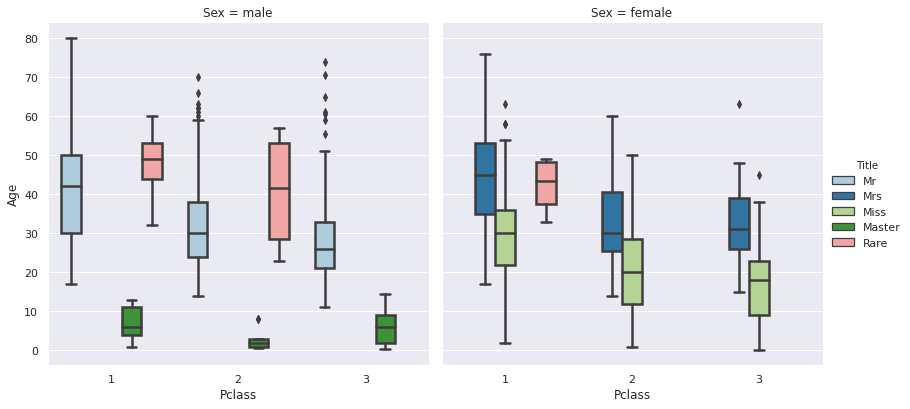

In [73]:
sns.catplot(x="Pclass", y="Age", hue="Title", col="Sex",\
            data=df, kind="box", height=5.85, aspect=1);

The box plots tell us that titles can indicate the ages of passengers. They also reveal that, within each title group, passengers in lower classes were typically younger than those in higher classes. Passengers with the Master title, however, deviated from this norm. Among the passengers who had this title, the passengers of Pclass 2 rather than Pclass 3 had the lowest maximum age.

Let us draw additional box plots to further explore the interrelations among the ages of the Titanic passengers and passenger class, gender, and other&nbsp;factors.

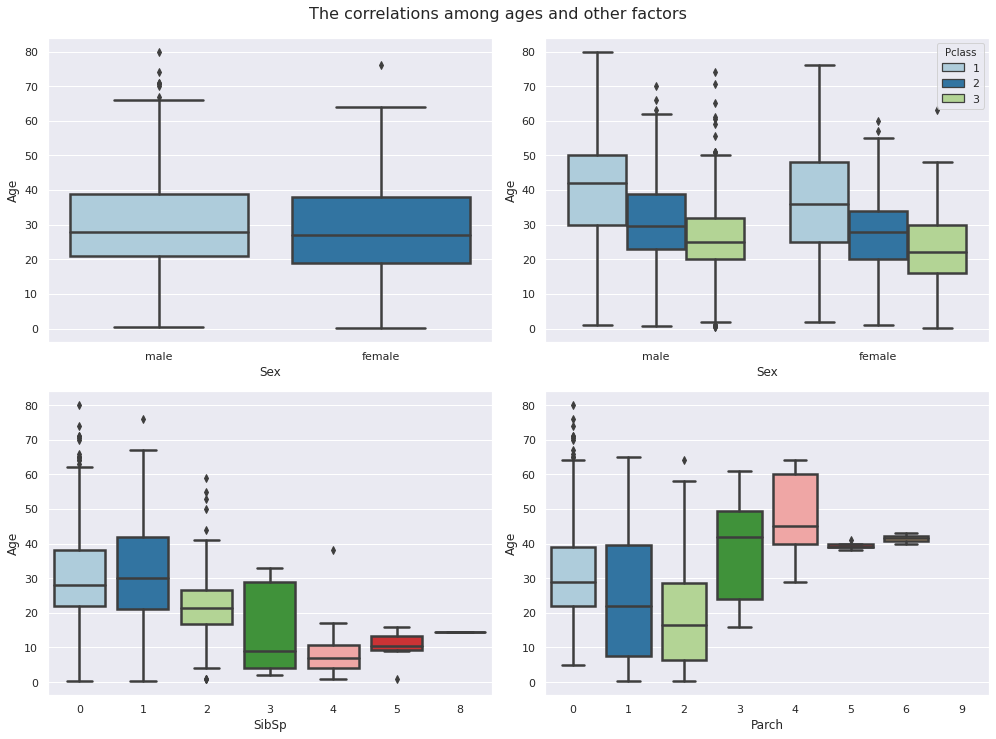

In [74]:
# Using boxplots to assess the correlations among the Age, Pclass, 
# Sex, SibSp, and Parch columns

y_col ="Age"
x_cols = {0: "Sex", 1: "Sex", 2: "SibSp", 3: "Parch"}

fig, ax = plt.subplots(2, 2, figsize=(14,10))
for tup, subplot in zip(x_cols.items(), ax.flatten()):
    if tup[0]==1:
        ax_n = sns.boxplot(x=tup[1], y=y_col, hue='Pclass', data=df, ax=subplot)
    else:    
        ax_n = sns.boxplot(x=tup[1], y=y_col, data=df, ax=subplot)

plt.suptitle('The correlations among ages and other factors',\
             size=16, y=1.025)
plt.tight_layout()

The first box plot shows that the overall ages of females were slightly lower than the overall ages of males. The second box plot affirms this perception. It also shows that the maximum ages of either gender decreased with class level. In other words, as far as maximum age was concerned, Pclass 1 > Pclass 2 > Pclass&nbsp;3.

The third and fourth box plots also reveal relevant facts. The third plot tells us that as SibSp increases, Age decreases—SibSp and age are primarily inversely proportional. And as per the fourth plot, Parch and Age are mostly directly proportional but their direct proportion isn't consistently maintained.

We will draw a heat map to better understand the correlations between Age, Sex, Title, SibSp, Parch, and Pclass. But before we draw the map, we will have to convert the nominal data in the Sex and Title columns into numerical values. We will pass on these numerical values to the heat map function.

In [75]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

df["Sex"] = encoder.fit_transform(df.Sex)
df["Title_enc"] = encoder.fit_transform(df.Title)

In [76]:
corr_cols = ['Age', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Title_enc']

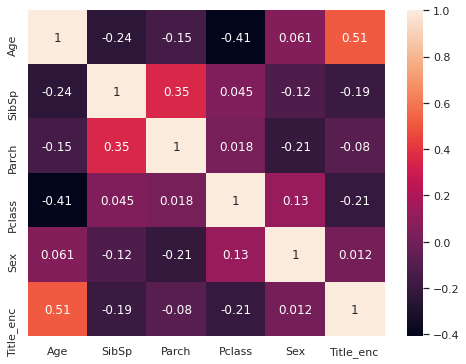

In [77]:
fig, ax = plt.subplots(figsize=(8, 6)) 
sns.heatmap(df[corr_cols].corr(), annot=True, ax=ax);

The heat map confirms that the correlation between Age and Sex is negligible. However, there is a strong positive correlative between Age and Title. In addition, significant negative correlations exist between Age and Pclass and Age and SibSp. A slight negative correlation is evident between Age and Parch as well. The correlation is negative because a direct proportion between Age and Parch isn't maintained consistently across the&nbsp;data.

Having determined the correlations, let us fill out each missing Age value based on the following strategy:

1. Select a row where the Age value is missing.


2. Identify the Pclass, Title_enc, SibSp, and Parch values in the row that you selected in step&nbsp;1.


3. Identify all other rows that contain Age values as well as the same combination of Pclass, Title_enc, SibSp, and Parch values that you identified in step&nbsp;2.


4. If you were able to identify rows during step 3, calculate a median age based on the ages in the identified rows. Proceed to step&nbsp;6.


5. If you couldn't retrieve any rows during step 3, do the following:

    a. Identify rows that contain Age values as well as any of the following combinations of values that you identified in step&nbsp;2: Pclass, Title_enc, and SibSp; Pclass, Title_enc, and Parch; Pclass and Title_enc.
    
    b. Calculate the median age in the identified rows.


6. Fill out the Age value in the row that you selected in step 1 with the median age that you determined in step 4&nbsp;or&nbsp;5.

In [78]:
# Saving the index of all the rows that contain missing ages
indexes = list(df.Age[df.Age.isnull()].index)

# Creating a list of column names that we will use to select values
s = ['Pclass', 'Title_enc', 'Parch', 'SibSp']

for i in indexes :
    
    # Saving median ages
    
    age_simple = df.Age[(df[s[0]]==df.iloc[i][s[0]]) &\
                        (df[s[1]]==df.iloc[i][s[1]])].median()
    
    age_Parch = df.Age[(df[s[0]]==df.iloc[i][s[0]]) &\
                       (df[s[1]]==df.iloc[i][s[1]]) &\
                       (df[s[2]]==df.iloc[i][s[2]])].median()
    
    age_SibSp = df.Age[(df[s[0]]==df.iloc[i][s[0]]) &\
                       (df[s[1]]==df.iloc[i][s[1]]) &\
                       (df[s[3]]==df.iloc[i][s[3]])].median()    
    
    
    age_complex = df.Age[(df[s[0]]==df.iloc[i][s[0]]) &\
                         (df[s[1]]==df.iloc[i][s[1]]) &\
                         (df[s[2]]==df.iloc[i][s[2]]) &\
                         (df[s[3]]==df.iloc[i][s[3]])].median()
    
    # Imputing ages
    
    try:
        if not np.isnan(age_complex) :
            df.loc[i, 'Age'] = age_complex
        elif not np.isnan(age_SibSp) :
            df.loc[i, 'Age'] = age_SibSp
        elif not np.isnan(age_Parch) :
            df.loc[i, 'Age'] = age_Parch
        else:
            df.loc[i, 'Age'] = age_simple
    except Exception as e:
        print(e)

Before we proceed further, we will delete the Title_enc column because we don't want to use it for calculations.

In [79]:
df.drop('Title_enc', axis=1, inplace=True)

Let us draw a box plot and a violin plot to view statistical measures and densities of ages of the passengers, based on whether they survived or&nbsp;not.

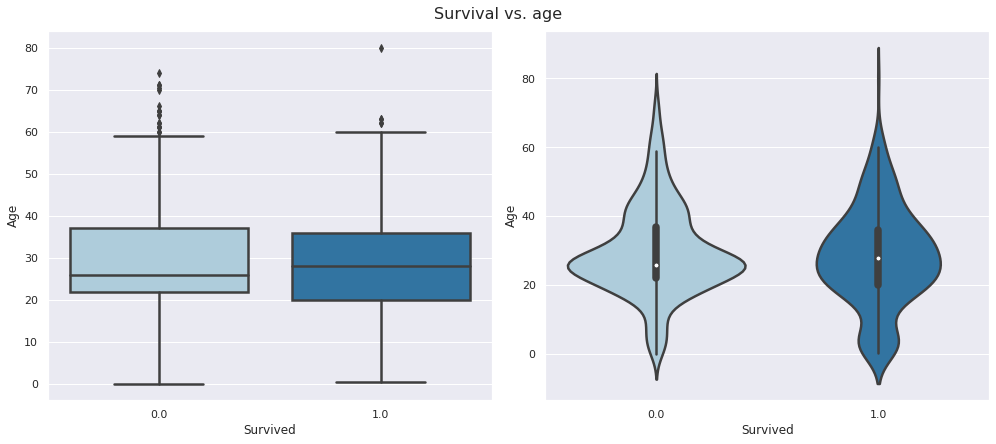

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

x = 'Survived'
y = 'Age'

for i in range(2):
    if i==0:
        sns.boxplot(x=x, y=y, data=df, ax=axes[i])
    else:
        sns.violinplot(x=x, y=y, data=df, ax=axes[i])
        
plt.suptitle('Survival vs. age', size=16, y=1.025)
plt.tight_layout()

The graphs show that the median age of those who survived was slightly higher than the median age of those who didn't. In addition, according to the violin plot, infants and toddlers had a higher survival rate than passengers in some of the other age groups.

Now that we have filled out missing values in the Age column, let us move on to creating a new column based on SibSp and Parch. This column will specify the total family size of each passenger.

In [81]:
df["FamilySize"] = df.SibSp + df.Parch + 1

Here is a line plot that compares survival probability and family&nbsp;size.

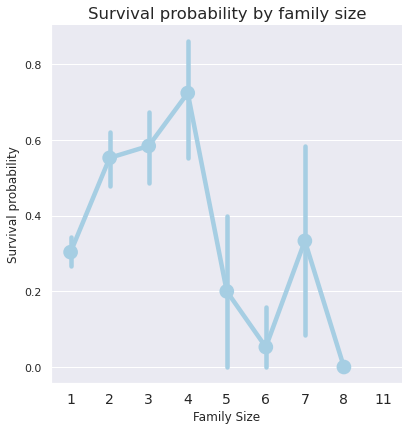

In [82]:
g = sns.catplot(x="FamilySize", y="Survived", data=df, kind='point', height=5.85, aspect=1)

set_generic_labels(g, xlabel='Family Size', ylabel='Survival probability',\
                   title='Survival probability by family size')
enhance_xtick_labels(g)

Apparently, passengers with one through three relatives on board had a higher probability of survival than other passengers. Note that this is contrary to what we had discovered in the training dataset. In that dataset, passengers with no family members also had a similar chance of survival as passengers with one through three relatives. There is some imbalance between the training and testing datasets. We will try to handle this imbalance, if necessary, as we progress through the project.

As family size matters, let us create family types based on family sizes. This might make it easier for our model to find patterns in the family-related&nbsp;data.

In [83]:
# Generating family types based on family size

def categorize_family(size):
    """
    This function returns a family type based on the 
    family size that is provided to it.
    """
    if (size <= 1):
        return 'single'
    elif (size <= 4):
        return 'small'
    else:
        return 'large'

In [84]:
# Creating colums to store family type

df['FamilyType'] = df.FamilySize.map(categorize_family)

In [85]:
# Deleting the FamilySize column

df.drop('FamilySize', axis=1, inplace=True)

Now, we will use the principles of one-hot encoding to create three new columns based on the FamilyType column.

In [86]:
def create_dummies(df, column_name):
    '''
    This function will convert a dataset column into dummy variables and
    append the dummies to the dataset.
    '''
    df = pd.get_dummies(df, columns = [column_name], prefix=column_name)
    return df

In [87]:
df = create_dummies(df, 'FamilyType')

Here are bar plots that depict the probability of survival of passengers based on family&nbsp;type.

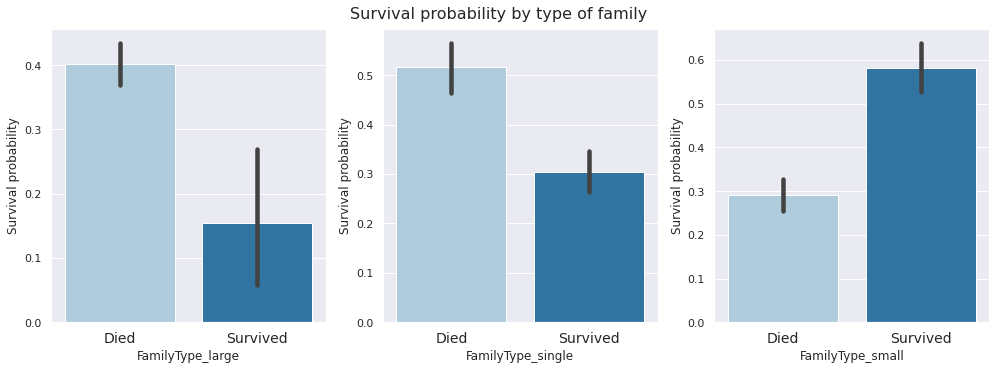

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))

cols = df.columns[-3:]
y = 'Survived'

ylabel = 'Survival probability'

for col, subplot in zip(cols, ax.flatten()):
    ax_n = sns.barplot(x=col, y=y, data=df, ax=subplot)
    set_generic_labels(ax_n, xlabel=col, ylabel=ylabel, title='')
    for ax_n in plt.gcf().axes:
        l = ax_n.get_xticklabels()
        ax_n.set_xticklabels(['Died', 'Survived'], fontsize=14)

plt.suptitle('Survival probability by type of family',\
             size=16, y=1.025)
plt.tight_layout()

Next, let us fill out the missing values in the Cabin column.

What types of values does the Cabin column contain?

In [89]:
df.Cabin[df.Cabin.notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Each cabin name seems to be prefixed with a letter. The letters in the cabin names provide valuable information. They denote the decks on which the corresponding cabins were located. So, we will replace the cabin names in the dataset with their letter prefixes. If any cabin names are not prefixed with letters, we will replace the names with the letter&nbsp;X.

In [90]:
df.Cabin = df.Cabin.map(lambda x: x[0] if not pd.isnull(x) else 'X')

In [91]:
df.Cabin.unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

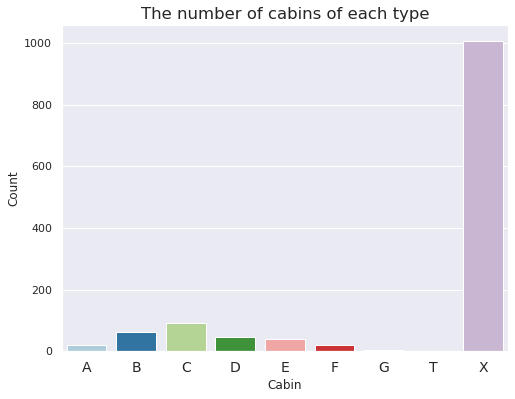

In [92]:
fig, ax = plt.subplots(figsize=(8, 6)) 
x_labels = list('ABCDEFGTX')

g = sns.countplot(x='Cabin', data=df, order=x_labels, ax=ax)

set_generic_labels(g, xlabel='Cabin', ylabel='Count',\
                   title='The number of cabins of each type')
enhance_xtick_labels(g)

Aside from the Xs, the C cabins are the most numerous.

Let us also plot survival probability based on cabin&nbsp;type.

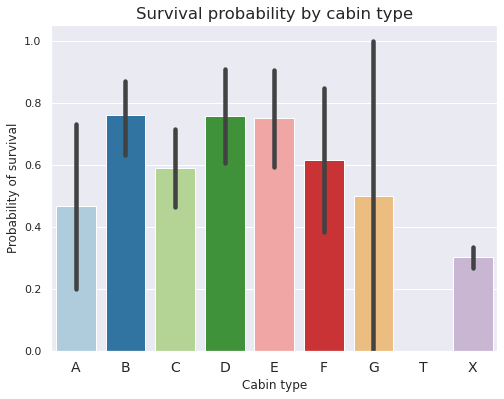

In [93]:
fig, ax = plt.subplots(figsize=(8, 6)) 

g = sns.barplot(x="Cabin", y="Survived", data=df, order=x_labels, ax=ax)

set_generic_labels(g, xlabel='Cabin type', ylabel='Probability of survival',\
                   title='Survival probability by cabin type')
enhance_xtick_labels(g)

Probably the passengers to whom we assigned the X cabin type didn't really have any cabins. So, they had a much lower chance of survival than the other passengers, who had cabins.

Next, let us look at the values in the Ticket column.

As the following code indicates, many of the ticket numbers also have letter prefixes. These prefixes might be related to cabin type and, therefore, passenger class.

In [94]:
df.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

As there are numerous Ticket prefixes, they won't add much value to predictions. Therefore, we will delete the Ticket column.

In [95]:
df.drop('Ticket', axis=True, inplace=True)

Next, to make our dataset more conducive to model building, we will remove the Name column from it. This column is irrelevant. It won't help with pattern recognition.

In [96]:
df.drop('Name', 1, inplace=True)

We will also add age categories and fare categories and then remove the Fare column.

In [97]:
cut_points = [-1, 1, 4, 12, 18, 35, 65, 100]
label_names = ["infant", "toddler", "child", "teenager",\
                   "young_adult", "adult", "senior"]

df["AgeCategory"] = pd.cut(df["Age"], cut_points, labels=label_names)

In [98]:
cut_points = [-1, 4, 10, 20, 45, 1000]
label_names = ["very_low", "low", "medium", "high", "very_high"]

df["FareCategory"] = pd.cut(df["Fare"], cut_points, labels=label_names)

In [99]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_uniform,Title,FamilyType_large,FamilyType_single,FamilyType_small,AgeCategory,FareCategory
0,1,0.0,3,1,22.0,1,0,7.2500,X,S,2.110213,Mr,0,0,1,young_adult,low
1,2,1.0,1,0,38.0,1,0,71.2833,C,C,4.280593,Mrs,0,0,1,adult,very_high
2,3,1.0,3,0,26.0,0,0,7.9250,X,S,2.188856,Miss,0,1,0,young_adult,low
3,4,1.0,1,0,35.0,1,0,53.1000,C,S,3.990834,Mrs,0,0,1,young_adult,very_high
4,5,0.0,3,1,35.0,0,0,8.0500,X,S,2.202765,Mr,0,1,0,young_adult,low


In [100]:
df.drop('Fare', axis=1, inplace=True)

An additional task that we will perform is converting Pclass and some of the other columns into categorical variables.

In [101]:
categorical_cols = ['Pclass', 'Cabin', 'Embarked', 'Title', 'AgeCategory', 'FareCategory']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        1298 non-null   int64   
 1   Survived           880 non-null    float64 
 2   Pclass             1298 non-null   category
 3   Sex                1298 non-null   int64   
 4   Age                1298 non-null   float64 
 5   SibSp              1298 non-null   int64   
 6   Parch              1298 non-null   int64   
 7   Cabin              1298 non-null   category
 8   Embarked           1298 non-null   category
 9   Fare_uniform       1298 non-null   float64 
 10  Title              1298 non-null   category
 11  FamilyType_large   1298 non-null   uint8   
 12  FamilyType_single  1298 non-null   uint8   
 13  FamilyType_small   1298 non-null   uint8   
 14  AgeCategory        1298 non-null   category
 15  FareCategory       1298 non-null   category
dtypes: cat

Finally, we will use the principles of one-hot encoding to convert the categorical columns into numerical columns, or dummy variables, containing binary values.

In [103]:
# Applying the create_dummies() function to specific columns

for col in categorical_cols:
    df = create_dummies(df, col)

We are now ready to build the proposed&nbsp;model.

## Step 7: Using a combination of algorithms to build a predictor&nbsp;model

In this step, we will use an ensemble of algorithms to build an aggregated predictor model. The ensembling techniques that we will use are as follows:

- **Bootstrap aggregation, also known as bagging**: Training multiple models on different subsets of the base data and aggregating the predictions of all the models to arrive at a final prediction

- **Boosting**: Training multiple models on the data consecutively, tuning each model to avoid the errors that its preceding models had&nbsp;made

- **Stacking**: Training multiple models on the data and using the predictions of all these models to create a combined algorithm that generates the final prediction

Let us begin by splitting the combined dataset into training and testing&nbsp;data.

In [104]:
df_train = df[:len_train].copy()
df_test = df[len_train:].copy()

Let us also change the dtype of the Survived column in df_train.

In [105]:
df_train.Survived = df_train.Survived.astype(int)

Next, we will drop the Survived column, which doesn't contain any data, from the testing dataset and reset the index of this dataset.

In [106]:
df_test = df_test.drop('Survived', 1).reset_index(drop=True)

Next, we will create datasets that segregate the independent and dependent variables in the overall training dataset.

In [107]:
X = df_train.drop(['PassengerId', "Survived"], axis = 1)
y = df_train.Survived.values

Now, we will normalize the independent variables.

In [108]:
cols_to_scale = ['Age', 'SibSp', 'Parch', 'Fare_uniform']

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in cols_to_scale:
    X[col] = scaler.fit_transform(np.array(X[col]).reshape(-1,1))

Next, we will create subsets of training and validation data from the X and y datasets. We will use these subsets to train and test our ensemble of algorithms.

In [110]:
seed = 0

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,\
                                                  test_size=0.2, random_state=seed)

In [111]:
# Resetting the indexes of X_train and X_val

X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)

In [112]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((704, 40), (704,), (176, 40), (176,))

### Bagging

We will test the accuracy of the bagging technique using the following ensembles:

- BaggingClassifier

- RandomForestClassifier

Let us begin with BaggingClassifier.

#### Bagging with BaggingClassifier

The BaggingClassifier ensemble needs a base estimator or algorithm. In this project, we will provide this ensemble with DecisionTreeClassifier as the base estimator.

In [113]:
# Importing relevant modules

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [114]:
# Specifying hyperparameters and creating instances

decision_tree_params = {'criterion': 'entropy', 'random_state': seed}
decision_tree = DecisionTreeClassifier(**decision_tree_params)

bg_cl_params = {'base_estimator': decision_tree, 'n_estimators': 50,\
                'max_samples': 0.5, 'random_state': seed, 'n_jobs': -1}
bg_cl = BaggingClassifier(**bg_cl_params)

In [115]:
# Writing a function that fits a model and predicts its accuracy

def predict_accuracy(instance, X_train, X_val, y_train):
    instance.fit(X_train, y_train)
    
    pred_train = instance.predict(X_train)
    pred_val = instance.predict(X_val)
    
    return (pred_train, pred_val)

In [116]:
# Writing a function that calculates accuracy scores

def calc_accuracy(instance, **data):
    '''
    This function accepts a classifier instance.
    It also accepts a dictionary that comprises the following values:
    X_train, X_val, y_train, y_val
    '''
    
    from sklearn.metrics import accuracy_score
    
    X_train = data['X_train']
    X_val = data['X_val']
    y_train = data['y_train']
    y_val = data['y_val']
    
    data_pred = [X_train, X_val, y_train]
    
    pred_train, pred_val = predict_accuracy(instance, *data_pred)
    
    accuracy_train = accuracy_score(y_true=y_train, y_pred=pred_train)
    accuracy_val = accuracy_score(y_true=y_val, y_pred=pred_val)
    
    return (accuracy_train, accuracy_val)

In [117]:
# Writing a function that prints accuracy scores

def print_scores(desc, instance, **data):    
    '''
    The first argument to this function is a classifier description, such as
    Bagging or Random forest.
    The second argument is a classifier instance.
    The third argument is a dictionary that comprises the following values:
    X_train, X_val, y_train, y_val
    '''
    
    accuracy_train, accuracy_val = calc_accuracy(instance, **data)
    
    print(f'{desc}')
    print(f'> Accuracy on training data = {accuracy_train:.4f}')
    print(f'> Accuracy on validation data = {accuracy_val:.4f}')

In [118]:
# Creating a dictionary of values for the prediction and printing functions

data = {}

data['X_train'] = X_train
data['X_val'] = X_val
data['y_train'] = y_train
data['y_val'] = y_val

In [119]:
# Printing the accuracy of the bagging classifier

desc = 'Bagging'
instance = bg_cl

print_scores(desc, instance, **data)

Bagging
> Accuracy on training data = 0.9304
> Accuracy on validation data = 0.8352


How does the accuracy of the ensemble compare with the accuracy of the decision tree&nbsp;alone?

In [120]:
# Using the functions to calculate and print the accuracy of the
# decision tree on its own

desc = 'Decision tree'
instance = decision_tree

print_scores(desc, instance, **data)

Decision tree
> Accuracy on training data = 0.9844
> Accuracy on validation data = 0.7955


The decision tree has a much higher training accuracy than the ensemble. However, its validation accuracy is a little lower than that of the ensemble.

Next, let us find out how RandomForestClassifier performs.

#### Bagging with RandomForestClassifier

In [121]:
from sklearn.ensemble import RandomForestClassifier

# Specifying hyperparameters and creating an instance of RandomForestClassifier

rf_params = {'criterion': 'entropy', 'n_estimators': 100, 'max_features': 0.5,\
             'min_samples_leaf': 8, 'n_jobs': -1, 'random_state': seed}
rf = RandomForestClassifier(**rf_params)

In [122]:
# Printing the accuracy of the random-forest classifier trained on all the data

desc = 'Random forest'
instance = rf

print_scores(desc, instance, **data)

Random forest
> Accuracy on training data = 0.8651
> Accuracy on validation data = 0.8125


Next, let us try boosting.

### Boosting

We will use AdaBoostClassifier and GradientBoostingClassifier for boosting. Let us begin with AdaBoostClassifier.

#### Boosting with AdaBoostClassifier

The AdaBoostClassifier ensemble needs a base estimator. In the following code, DecisionTreeClassifier will be this base estimator.

In [123]:
# Importing the relevant module

from sklearn.ensemble import AdaBoostClassifier

In [124]:
# Specifying hyperparameters and creating instances

decision_tree_params = {'max_depth': 1, 'random_state': seed}
decision_tree = DecisionTreeClassifier(**decision_tree_params)

ab_params = {'base_estimator': decision_tree, 'n_estimators': 100,\
             'random_state': seed}
ab = AdaBoostClassifier(**ab_params)

In [125]:
# Printing the accuracy of the ada-boost classifier on the limited data

desc = 'Ada boost'
instance = ab

print_scores(desc, instance, **data)

Ada boost
> Accuracy on training data = 0.8580
> Accuracy on validation data = 0.8409


The accuracy of the ada-boost classifier on the validation data is lower than the accuracy of the bagging classifier.

Let us find out how the ada-boost classifier performs with a varying number of base estimators.

In [126]:
# Removing n_estimators from ab_params

ab_params = {'base_estimator': decision_tree, 'random_state': seed}

# Creating variables

num_estimators = list(range(10, 210, 10))
train_accuracies, val_accuracies = [], []

# Using a loop to apply different numbers of estimators to ada boost

for num in num_estimators:
    ab = AdaBoostClassifier(n_estimators=num, **ab_params)
    
    # Retrieving accuracies
    
    accuracy_train, accuracy_val = calc_accuracy(ab, **data)
    
    # Appending the accuracies to lists
    
    train_accuracies.append(accuracy_train)
    val_accuracies.append(accuracy_val)

Let us depict the variations in the prediction accuracies in a graph.

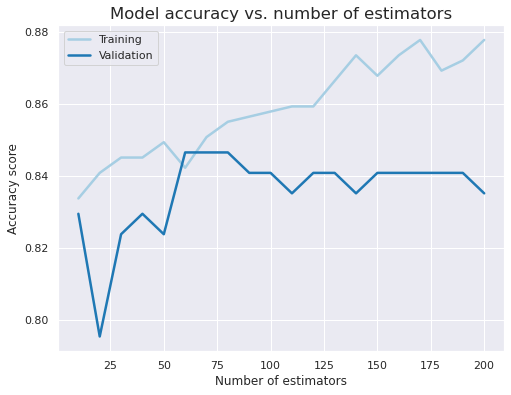

In [127]:
fig, ax = plt.subplots(figsize=(8, 6))

g = sns.lineplot(num_estimators, train_accuracies, label='Training')
g = sns.lineplot(num_estimators, val_accuracies, label='Validation');

set_generic_labels(g, xlabel='Number of estimators', ylabel='Accuracy score',\
                   title='Model accuracy vs. number of estimators')

The graph indicates that training accuracy increases as the number of estimators increases, with minor fluctuations throughout. By contrast, validation accuracy increases consistently while the number of estimators is between 20 and 60. Subsequently, it fluctuates, reaching its highest point again at 150 estimators and then dipping.

Next, let us try gradient boosting.

#### Boosting with GradientBoostingClassifier 


In [128]:
# Importing relevant modules

from sklearn.ensemble import GradientBoostingClassifier

In [129]:
# Specifying hyperparameters and creating an instance of GradientBoostingClassifier

gb_params = {'n_estimators': 100, 'max_depth': 5,\
             'min_samples_leaf': 1, 'random_state': seed}
gb = GradientBoostingClassifier(**gb_params)

In [130]:
# Printing the accuracy of the gradient-boosting classifier

desc = 'Gradient boosting'
instance = gb

print_scores(desc, instance, **data)

Gradient boosting
> Accuracy on training data = 0.9716
> Accuracy on validation data = 0.8239


The gradient-boosting classifier has a higher accuracy than ada boost on the validation dataset.

How will stacking work? Let us find out.

### Stacking

For stacking, we will use LogisticRegression as the ensemble model. Our base estimators will be KNeighborsClassifier, which is an implementation of the k-nearest-neighbors (KNN) algorithm, bagging, and gradient boosting.

The stacking process will comprise the following broad-level steps:

1. Divide the X_train and y_train data according to the k-fold strategy, with four-fifth of the data reserved for training and one-fifth of the data reserved for prediction.

2. Train the estimators on the four-fifth training data.

3. Obtain predictions on the one-fifth prediction data.

4. Save the predictions in an additional column of a numpy array that contains all the columnar data of the X_train dataset.

5. Train the estimators on the entire X_train and y_train datasets.

6. Obtain predictions on the entire X_val dataset.

7. Save the predictions in an additional column of a numpy array that contains all the columnar data of the X_val dataset.

8. Train the logistic-regression model on the entire numpy array mentioned in step 4, as well as the y-train dataset.

9. Obtain the predictions of the logistic-regression model on the numpy arrays mentioned in steps 4 and&nbsp;7.

10. Compare the prediction accuracies of the logistic-regression model with the prediction accuracies of the base estimators.

We will begin by importing relevant modules, and then we will proceed with the other stacking tasks.

In [131]:
# Importing relevant modules

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [132]:
# Setting a seed to shuffle the training data
np.random.seed(seed)

# Initializing a kfold instance
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)

In [133]:
# Saving classifier instances in a list

knn = KNeighborsClassifier(n_neighbors=4)

clfs = [knn, bg_cl, gb]

In [134]:
# Creating a training array to blend X_train data with the predictions that the
# base estimators will make on data split by the k-fold method

X_train_stacks = np.zeros((X_train.shape[0], X_train.shape[1] + len(clfs)))

X_train_stacks[:, :-len(clfs)] = X_train
X_train_stacks[:, -len(clfs):] = -1

In [135]:
# Splitting the data

for train_idx, val_idx in kf.split(X_train):
    kfold_X_train, kfold_X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    kfold_y_train, kfold_y_val = y_train[train_idx], y_train[val_idx]
    
    # Training classifier models on the split data
    
    for i, clf in enumerate(clfs):

        clf.fit(kfold_X_train, kfold_y_train)
        
        pred_val = clf.predict(kfold_X_val)
        
        X_train_stacks[val_idx, -(i + 1)] = pred_val

Next, we will create a new numpy array that contains all the X_val data along with columns of null values.

In [136]:
# Creating a validation array to blend X_val data with the predictions that the
# base estimators will make on the entire training dataset

X_val_stacks = np.zeros((X_val.shape[0], X_val.shape[1] + len(clfs)))

X_val_stacks[:, :-len(clfs)] = X_val
X_val_stacks[:, -len(clfs):] = -1

Now, we will train the base estimators on the entire training dataset and obtain predictions.

In [137]:
for i, clf in enumerate(clfs):

    clf.fit(X_train, y_train)

    pred_val = clf.predict(X_val)

    X_val_stacks[:, -(i + 1)] = pred_val

Finally, we will train and assess the logistic-regression model using the numpy arrays that we have created.

In [138]:
lr = LogisticRegression(max_iter=1000, random_state=seed)

desc = '==== Stacked classifier (Logistic Regression) ====\n'
instance = lr
data['X_train'] = X_train_stacks
data['X_val'] = X_val_stacks

print_scores(desc, instance, **data)

==== Stacked classifier (Logistic Regression) ====

> Accuracy on training data = 0.8452
> Accuracy on validation data = 0.8352


In [139]:
model_names = ['kNN', 'Bagging', 'Gradient boosting']

print('==== Base estimators ====')
for i, clf in enumerate(clfs):
    
    train_acc = accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))
    val_acc = accuracy_score(y_true=y_val, y_pred=clf.predict(X_val))
    
    print(f'\n{model_names[i]}:\n> Accuracy on training data = {train_acc:.4f}\
    \n  Accuracy on validation data = {val_acc:.4f}')

==== Base estimators ====

kNN:
> Accuracy on training data = 0.8551    
  Accuracy on validation data = 0.8182

Bagging:
> Accuracy on training data = 0.9304    
  Accuracy on validation data = 0.8352

Gradient boosting:
> Accuracy on training data = 0.9716    
  Accuracy on validation data = 0.8239


## Saving results

In [140]:
for col in cols_to_scale:
    df_test[col] = scaler.fit_transform(np.array(df_test[col]).reshape(-1,1))

In [141]:
final_pred_gb = gb.predict(df_test.iloc[:, 1:])

result_gb = pd.DataFrame({'PassengerId': df_test.PassengerId,\
                       'Survived': final_pred_gb})

result_gb.to_csv('output_gb.csv', index=False)

print("Gradient-boosting results were successfully saved!")

Gradient-boosting results were successfully saved!


## Step 8: Applying a different strategy

In this step, we will use a modified strategy to preprocess data and then train multiple classifiers on the data. The classifiers that we will train include the following:
- Logistic regression

- KNN

- Support-vector-machines classifier (SVC)

- The decision-tree classifier

- The random-forest classifier

- The bagging classifier

- The ada-boost classifier

- The extra-trees classifier

- The gaussian-process classifier

- The voting classifier

### Data preprocessing

In [142]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# Creating a new dataframe that comprises the PassengerId column and
# offers the scope of adding test predictions later

output = pd.DataFrame(test.PassengerId)

In [143]:
def get_nulls_dtypes(df):
    mask = df.isnull()
    total = mask.sum()
    percent = mask.mean() * 100
    dtypes = df.dtypes

    missing_data = pd.concat([total, percent, dtypes], axis=1, join='outer',\
                             keys=['count_null', 'percent_null', 'data_type'])
    missing_data.sort_values(by='percent_null', ascending=False, inplace=True)
    return missing_data[missing_data.count_null > 0]

In [144]:
# Calculating the counts and percentages of null values

get_nulls_dtypes(train)

,count_null,percent_null,data_type
Cabin,687,77.104377,object
Age,177,19.865320,float64
Embarked,2,0.224467,object


In [145]:
get_nulls_dtypes(test)

,count_null,percent_null,data_type
Cabin,327,78.229665,object
Age,86,20.574163,float64
Fare,1,0.239234,float64


In [146]:
# Preparing to fill out some of the missing values
# Combining datasets so as to easily fill Cabin values

len_uncombined = len(train)

combined =  pd.concat([train, test], axis=0).reset_index(drop=True)

In [147]:
# Filling missing Embarked and Fare values

combined.Embarked = combined.groupby(['Pclass', 'Sex']).Embarked.apply(lambda x: x.fillna(x.mode()[0]))
combined.Fare = combined.groupby(['Pclass', 'Embarked', 'Sex'])['Fare'].apply(lambda x: x.fillna(x.mean()))

In [148]:
# Filling missing Cabin values
# Extracting letters from Cabin values, adding a placeholder X to each field that returns a NaN value

combined.Cabin = combined.Cabin.map(lambda x: x[0] if not pd.isnull(x) else 'X')

In [149]:
def get_feature_counts_perc(df, feature):
    total = combined[feature].value_counts(dropna=False)
    percent = round((combined[feature].value_counts(dropna=False,\
                                                    normalize=True)) * 100, 2)
    return pd.concat([total, percent], axis=1, join='outer',\
                             keys=['count', 'percent'])

In [150]:
# Calculating total count and percentage of each type of cabin in the Cabin column

get_feature_counts_perc(combined, 'Cabin')

,count,percent
X,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [151]:
# Obtaining the mean Fare for each type of cabin

combined.groupby('Cabin').Fare.mean().sort_values()

Cabin
G     14.205000
F     18.079367
X     19.126803
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [152]:
# Preparing to replace each placeholder value in the Cabin column with one of the
# original cabin types, based on the corresponding fare

def get_cabin_type(i):
    '''
    This function returns a letter based on the
    numeric value that's provided to it.
    '''
    if i<16:
        return "G"
    elif i>=16 and i<27:
        return "F"
    elif i>=27 and i<38:
        return "T"
    elif i>=38 and i<47:
        return "A"
    elif i>= 47 and i<53:
        return "E"
    elif i>= 53 and i<54:
        return "D"
    elif i>=54 and i<116:
        return 'C'
    else:
        return "B"

In [153]:
combined.loc[combined.Cabin=='X', 'Cabin'] = combined[combined.Cabin=='X'].\
    Fare.apply(lambda x: get_cabin_type(x))

In [154]:
# Retrieving the train and test datasets from combined

train = combined[:len_uncombined].copy()
test = combined[len_uncombined:].copy()

In [155]:
# Removing Survived column from the test dataset

test = test.drop('Survived', 1).reset_index(drop=True)

In [156]:
# Extracting titles from names

train['Title'] = train['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

In [157]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [158]:
# Replacing each title with its corresponding category

train['Title'] = train['Title'].map(title_dict)
test['Title'] = test['Title'].map(title_dict)

In [159]:
# Adding a family-size column

train["FamilySize"] = train['SibSp'] + train['Parch'] + 1
test["FamilySize"] = test['SibSp'] + test['Parch'] + 1

In [160]:
# Creating colums to store family type

train['FamilyType'] = train['FamilySize'].map(categorize_family)
test['FamilyType'] = test['FamilySize'].map(categorize_family)

In [161]:
# Adding fare based on family average because some passengers'
# fares might be the total amount they paid for all their companions

train['FareFamAverage'] = train['Fare'] / train['FamilySize']
test['FareFamAverage'] = test['Fare'] / test['FamilySize']

In [162]:
# Create fare categories based on the average fare per family

cut_points = [-1, 4, 10, 20, 45, 1000]
label_names = ["very_low", "low", "medium", "high", "very_high"]

train["FareCategory"] = pd.cut(train["FareFamAverage"], cut_points, labels=label_names)
test["FareCategory"] = pd.cut(test["FareFamAverage"], cut_points, labels=label_names)

In [163]:
# Deleting some of the columns that might not be conducive to model training

cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Fare', 'FamilySize']

train.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)

In [164]:
# Preparing to generate dummies from some of the columns

datasets = [train, test]

train.Survived = train.Survived.astype(int)

for dataset in datasets:
    dataset.Pclass = dataset.Pclass.astype('category')

In [165]:
categorical_cols = list(train.select_dtypes\
                                (include=['object', 'category']).columns)

In [166]:
# Creating dummies

for col in categorical_cols:
    train = create_dummies(train, col)
    test = create_dummies(test, col)

In [167]:
# Deleting the Sex_female column because it represents one of two categories

datasets = [train, test]

for dataset in datasets:
    dataset.drop('Sex_female', axis=1, inplace=True)

In [168]:
# # Rearranging dataset columns for easy slicing
# train = pd.concat([train[["Survived", "Age", "SibSp","Parch"]], train.loc[:,"IsAlone":]], axis=1)
# test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [169]:
# Preparing to use RandomForestRegressor to impute missing ages

# Importing relevant module
from sklearn.ensemble import RandomForestRegressor

# Importing an age-imputer function
# Adding function with edits
def impute_ages(df):
    
    # Removing Survived column from df
    df_age = df.loc[:,"Age":] 
    
    # Creating a dataset that comprises rows that include ages and
    # a dataset that comprises rows with missing ages
    temp_train = df_age.loc[df_age.Age.notnull()]
    temp_test = df_age.loc[df_age.Age.isnull()]
    
    # Creating a training dataset that includes all values except age from temp_train
    X = temp_train.loc[:, "SibSp":].values
    
    # Creating a validation dataset that includes only ages
    y = temp_train.Age.values
    
    # Instantiating model
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    
    # Fitting model
    rfr.fit(X, y)
    
    # Obtaining predictions for the temp_test dataset
    predicted_ages = rfr.predict(temp_test.loc[:, "SibSp":])
    
    # Filling the null fields in the Age column of df
    df.loc[df.Age.isnull(), "Age"] = predicted_ages
    
    return "Imputed ages successfully"

In [170]:
# Applying the age-imputer function

impute_ages(train)
impute_ages(test)

'Imputed ages successfully'

In [171]:
# Creating age categories

cut_points = [-1, 1, 4, 12, 18, 35, 65, 100]
label_names = ["infant", "toddler", "child", "teenager",\
                   "young_adult", "adult", "senior"]

train["AgeCategory"] = pd.cut(train["Age"], cut_points, labels=label_names)
test["AgeCategory"] = pd.cut(test["Age"], cut_points, labels=label_names)

In [172]:
# Creating dummies based on the age categories

train = pd.get_dummies(train, columns=['AgeCategory'], drop_first=True)
test = pd.get_dummies(test, columns=['AgeCategory'], drop_first=True)

In [173]:
# Preparing to scale the data in the numerical columns

numerical_cols = list(test.select_dtypes\
                                (include=['int64', 'float64', 'int32']).columns)

In [174]:
# Scaling numerical columns

scaler = StandardScaler()

datasets = [train, test]

for dataset in datasets:
    dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

In [175]:
# Creating training and target data based on the train dataset

X = train.drop('Survived', axis=1)
y = train.Survived

In [176]:
feature_cols = X.columns

In [177]:
# Creating further subsets for training and validation

X_train, X_val, y_train, y_val = train_test_split(X, y,\
                                                  test_size = .33, random_state=seed)

In [178]:

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((596, 38), (295, 38), (596,), (295,))

In [179]:
pd.DataFrame(X_train, columns=feature_cols).head(3)

,Age,SibSp,Parch,FareFamAverage,Pclass_1,Pclass_2,Pclass_3,Sex_male,Cabin_A,Cabin_B,...,FareCategory_low,FareCategory_medium,FareCategory_high,FareCategory_very_high,AgeCategory_toddler,AgeCategory_child,AgeCategory_teenager,AgeCategory_young_adult,AgeCategory_adult,AgeCategory_senior
242,-0.045081,-0.474545,-0.473674,-0.262872,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
344,0.463370,-0.474545,-0.473674,-0.193081,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
170,2.279268,-0.474545,-0.473674,0.379207,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


### Classifier training

#### Logistic regression

In [180]:
# Training a LogisticRegression classifier and
# determining its accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

lr = LogisticRegression(solver='liblinear',
                            penalty= 'l1', random_state = seed)

lr.fit(X_train, y_train)

pred_train = lr.predict(X_train)
pred_val = lr.predict(X_val)

print('Accuracy on training data: ', accuracy_score(y_true=y_train, y_pred=pred_train))
print('Accuracy on validation data: ', accuracy_score(y_true=y_val, y_pred=pred_val))

Accuracy on training data:  0.8422818791946308
Accuracy on validation data:  0.8169491525423729


In [181]:
# Using a confusion matrix to compare predictions with actual data

from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_val, pred_val),\
            columns=["Predicted not survived", "Predicted survived"],\
            index=["Didn't survive","Survived"])

,Predicted not survived,Predicted survived
Didn't survive,156,28
Survived,26,85


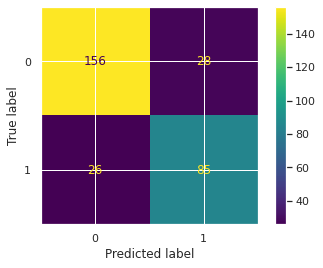

In [182]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_val, pred_val)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [183]:
# Printing a consolidated report of training outcome

from sklearn.metrics import classification_report

print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.77      0.76       111

    accuracy                           0.82       295
   macro avg       0.80      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



In [184]:
# Performing cross validation and determining accuracy
# Training on multiple samples of data

# Importing relevant module   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

# Initialize instance
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state=seed)

# Scale data
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

accuracies = cross_val_score(LogisticRegression(solver='liblinear',\
                                                random_state=seed), X, y, cv=cv)

print (f"Cross-validation accuracy scores: {[round(a, 2) for a in accuracies]}")
print (f"\nMean cross-validation accuracy score: {round(accuracies.mean(), 2)}")

Cross-validation accuracy scores: [0.8, 0.82, 0.82, 0.87, 0.83, 0.81, 0.83, 0.87, 0.83, 0.83]

Mean cross-validation accuracy score: 0.83


In [185]:
# Using grid search to identify optimal parameters
# Cross validating with StratifiedShuffleSplit on multiple samples of data

from sklearn.model_selection import GridSearchCV

# Defining C values, which will be used to control model complexity
# Model complexity inversely proportional to C values

c_vals = np.linspace(0.2, 1, 9)
grid_search_param = {'C': c_vals}

# Initializing sampler 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=seed)

lr = LogisticRegression(random_state=seed)

# Instantiating GridSearchCV 
grid_lr = GridSearchCV(estimator = lr, param_grid = grid_search_param,\
                    scoring = 'accuracy', n_jobs = -1, cv = cv)

# Fitting the model
grid_lr.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='accuracy')

In [186]:
# Getting the best details from the grid

print(grid_lr.best_score_)
print(grid_lr.best_params_)
print(grid_lr.best_estimator_)

0.8318385650224215
{'C': 0.5}
LogisticRegression(C=0.5, random_state=0)


In [187]:
# Using the best grid parameters to score model

lr_grid = grid_lr.best_estimator_
lr_grid.score(X, y)

0.8372615039281706

#### KNN

In [188]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='minkowski', p=2,)

cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=seed)

accuracies = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')

print (f"Cross-validation accuracy scores: {[round(a, 2) for a in accuracies]}")
print (f"\nMean cross-validation accuracy score: {round(accuracies.mean(), 2)}")

Cross-validation accuracy scores: [0.8, 0.76, 0.79, 0.84, 0.82, 0.78, 0.78, 0.84, 0.82, 0.82]

Mean cross-validation accuracy score: 0.8


In [189]:
# Using a loop to determine the optimal number of neighbors, k, for the KNN classifier

k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv = cv, scoring='accuracy')
    k_scores.append(scores.mean())
    
print(f"Accuracy scores are: {k_scores}\n")
print (f"Mean accuracy score: {np.mean(k_scores)}")

Accuracy scores are: [0.758744394618834, 0.777578475336323, 0.7968609865470851, 0.794170403587444, 0.8044843049327355, 0.7982062780269058, 0.8170403587443946, 0.8062780269058296, 0.8089686098654709, 0.8022421524663678, 0.8044843049327353, 0.8040358744394618, 0.804932735426009, 0.8098654708520179, 0.8094170403587443, 0.8035874439461883, 0.8040358744394618, 0.8004484304932735, 0.8035874439461883, 0.7999999999999999, 0.8040358744394618, 0.8031390134529148, 0.8044843049327355, 0.8040358744394618, 0.8026905829596412, 0.7995515695067265, 0.8008968609865471, 0.7955156950672645, 0.799103139013453, 0.7946188340807174]

Mean accuracy score: 0.8005680119581466


In [190]:
# Using grid search to identify optimal parameters for KNN

k_range = range(1, 31)
weights=['uniform','distance']
knn_params = {'n_neighbors': k_range, 'weights': weights}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=seed)

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv,\
                    verbose=False, n_jobs=-1)

grid_knn.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [191]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

0.8093283582089551
{'n_neighbors': 18, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=18)


In [192]:
knn_grid= grid_knn.best_estimator_
knn_grid.score(X, y)

0.8372615039281706

#### SVC

In [193]:
from sklearn.svm import SVC

penalty_params = [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10]
gammas = [0.0001,0.001, 0.01, 0.1, 1]
svc_params = {'C': penalty_params, 'gamma' : gammas, 'random_state': [seed]}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=seed)
grid_svc = GridSearchCV(SVC(kernel='rbf', probability=True), svc_params, cv=cv)

grid_svc.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'random_state': [0]})

In [194]:
print(grid_svc.best_score_)
print(grid_svc.best_params_)
print(grid_svc.best_estimator_)

0.8369402985074628
{'C': 1.5, 'gamma': 0.01, 'random_state': 0}
SVC(C=1.5, gamma=0.01, probability=True, random_state=0)


In [195]:
svc_grid = grid_svc.best_estimator_
svc_grid.score(X, y)

0.8316498316498316

#### The decision-tree classifier

In [196]:
from sklearn.tree import DecisionTreeClassifier

max_depth = range(1, 30)
max_feature = [21, 22, 23, 24, 25, 26, 28, 29, 30,'auto']
criteria = ["entropy", "gini"]

dt_params = {'max_depth': max_depth, 'max_features': max_feature,\
             'criterion': criteria, 'random_state': [seed]}

cv = StratifiedShuffleSplit(n_splits=20, random_state=seed)
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=dt_params,\
                    verbose=False, cv=cv, n_jobs = -1)
grid_dt.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=20, random_state=0, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30,
                                          'auto'],
                         'random_state': [0]},
             verbose=False)

In [197]:
print(grid_dt.best_score_)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

0.8338888888888889
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 24, 'random_state': 0}
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=24,
                       random_state=0)


In [198]:
dt_grid = grid_dt.best_estimator_
dt_grid.score(X, y)

0.8383838383838383

In [199]:
# Determining feature importance

feature_importances = pd.DataFrame(dt_grid.feature_importances_,\
                                   index = feature_cols, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Title_Mr,0.558463
Pclass_3,0.145379
FareFamAverage,0.112805
Title_Rare,0.092300
FamilyType_large,0.085558
Parch,0.005495
Age,0.000000
FareCategory_medium,0.000000
FamilyType_single,0.000000
FamilyType_small,0.000000


#### The random-forest classifier

In [200]:
from sklearn.model_selection import StratifiedKFold

n_estimators = [140, 145, 150, 155, 160]
max_depth = range(1, 10);
criteria = ['gini', 'entropy']

parameters = {'n_estimators': n_estimators, 'max_depth': max_depth,\
              'criterion': criteria, 'random_state': [seed]}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=seed)

grid_rf = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),\
                    param_grid=parameters, cv=cv, n_jobs = -1)
grid_rf.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160],
                         'random_state': [0]})

In [201]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

0.8283582089552238
{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 150, 'random_state': 0}
RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=150,
                       random_state=0)


In [202]:
rf_grid = grid_rf.best_estimator_
rf_grid.score(X, y)

0.9191919191919192

In [203]:
feature_importances = pd.DataFrame(rf_grid.feature_importances_,\
                                   index = feature_cols, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Title_Mr,0.144552
Sex_male,0.144520
FareFamAverage,0.124900
Age,0.107354
Title_Miss,0.040680
Pclass_3,0.040480
Title_Mrs,0.033742
SibSp,0.028986
Pclass_1,0.026165
FamilyType_small,0.024317


#### The bagging classifier

In [204]:
n_estimators = [10, 30, 50, 70, 80, 150, 160, 170, 175, 180, 185]
parameters = {'n_estimators': n_estimators, 'random_state': [seed]}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=seed)

grid_bagging = GridSearchCV(BaggingClassifier(base_estimator=None,\
                            bootstrap_features=False),\
                            param_grid=parameters, cv=cv, n_jobs=-1)

grid_bagging.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185],
                         'random_state': [0]})

In [205]:
print(grid_bagging.best_score_)
print(grid_bagging.best_params_)
print(grid_bagging.best_estimator_)

0.817910447761194
{'n_estimators': 50, 'random_state': 0}
BaggingClassifier(n_estimators=50, random_state=0)


In [206]:
bagging_grid = grid_bagging.best_estimator_
bagging_grid.score(X, y)

0.9876543209876543

#### The ada-boost classifier

In [207]:
learning_r = [0.01, 0.1, 0.5, 1]
n_estimators = [100, 140, 145, 150, 160, 170, 175, 180, 185];
parameters = {'n_estimators': n_estimators, 'learning_rate': learning_r,\
              'random_state': [seed]}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=seed)

grid_ada = GridSearchCV(AdaBoostClassifier(base_estimator= None),\
                    param_grid=parameters, cv=cv, n_jobs = -1)

grid_ada.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.3,
            train_size=None),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [100, 140, 145, 150, 160, 170, 175,
                                          180, 185],
                         'random_state': [0]})

In [208]:
print(grid_ada.best_score_)
print(grid_ada.best_params_)
print(grid_ada.best_estimator_)

0.8186567164179104
{'learning_rate': 0.5, 'n_estimators': 170, 'random_state': 0}
AdaBoostClassifier(learning_rate=0.5, n_estimators=170, random_state=0)


In [209]:
ada_grid = grid_ada.best_estimator_
ada_grid.score(X, y)

0.8552188552188552

#### The extra-trees classifier

In [210]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(random_state=seed)

et.fit(X, y)

et_pred_val = et.predict(X_val)
et_acc = round(accuracy_score(y_true=y_val, y_pred=et_pred_val), 3)
print(et_acc)

0.99


#### The gaussian-process classifier

In [211]:
from sklearn.gaussian_process import GaussianProcessClassifier

gp = GaussianProcessClassifier(random_state=seed)

gp.fit(X, y)

gp_pred_val = gp.predict(X_val)
gp_acc = round(accuracy_score(y_true=y_val, y_pred=gp_pred_val), 3)
print(gp_acc)

0.895


#### The voting classifier

In [212]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[
    ('logistic_regression', lr_grid),
    ('knn', knn_grid),
    ('svc', svc_grid),
    ('decision_tree', dt_grid),
    ('random_forest', rf_grid),
    ('bagging', bagging_grid),
    ('ada_boosting', ada_grid),
    ('extra_trees', et),
    ('gaussian_process', gp)
], voting='hard')

vc.fit(X, y)

vc_pred_val = vc.predict(X_val)
vc_acc = round(accuracy_score(y_true=y_val, y_pred=vc_pred_val), 3)
print(vc_acc)

0.888


### Using an ROC graph to depict model accuracy

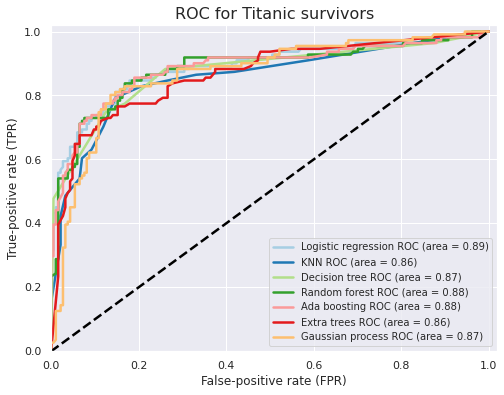

In [213]:
# Depicting model accuracy in a graph
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(figsize=(8, 6)) 

# Logistic Regression
score_val = lr_grid.decision_function(X_val)
fpr, tpr, thresholds = roc_curve(y_val, score_val)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Logistic regression ROC (area = {roc_auc:0.2f})')

# KNN
probabilities = knn_grid.fit(X_train, y_train).predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'KNN ROC (area = {roc_auc:0.2f})')

# Decision tree
probabilities = dt_grid.fit(X_train, y_train).predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Decision tree ROC (area = {roc_auc:0.2f})')

# Random forest
probabilities = rf_grid.fit(X_train, y_train).predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random forest ROC (area = {roc_auc:0.2f})')

# Ada boosting
probabilities = ada_grid.fit(X_train, y_train).predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Ada boosting ROC (area = {roc_auc:0.2f})')

# Extra trees
probabilities = et.fit(X_train, y_train).predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Extra trees ROC (area = {roc_auc:0.2f})')

# Gaussian process
probabilities = gp.fit(X_train, y_train).predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Gaussian process ROC (area = {roc_auc:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.02])
plt.ylim([0.0, 1.02])
plt.xlabel('False-positive rate (FPR)')
plt.ylabel('True-positive rate (TPR)')
plt.title('ROC for Titanic survivors', fontsize= 16)
plt.legend(loc=0, fontsize='small');

### Saving results

In [214]:
models = [lr_grid, knn_grid, svc_grid, dt_grid, rf_grid,\
          bagging_grid, ada_grid, et, gp, vc]

scores = {}

for model in models:
    pred = model.predict(X_val)
    acc = accuracy_score(y_true=y_val, y_pred=pred)
    scores[model] = acc

In [215]:
final_pred_vc = vc.predict(test)
final_pred_lr_grid = lr_grid.predict(test)
final_pred_rf_grid = rf_grid.predict(test)
final_pred_ada_grid = ada_grid.predict(test)
final_pred_score = (max(scores, key=scores.get)).predict(test)

In [216]:
output_vc = output.copy()
output_lr_grid = output.copy()
output_rf_grid = output.copy()
output_ada_grid = output.copy()
output_score = output.copy()

In [217]:
output_vc.insert(1, 'Survived', final_pred_vc)
output_vc.to_csv('reworked_results_vc.csv', index=False)
print("VC results were successfully saved!")

VC results were successfully saved!


In [218]:
output_lr_grid.insert(1, 'Survived', final_pred_lr_grid)
output_lr_grid.to_csv('reworked_results_lr_grid.csv', index=False)
print("Logistic-regression results were successfully saved!")

Logistic-regression results were successfully saved!


In [219]:
output_rf_grid.insert(1, 'Survived', final_pred_rf_grid)
output_rf_grid.to_csv('reworked_results_rf_grid.csv', index=False)
print("Random forest results were successfully saved!")

Random forest results were successfully saved!


In [220]:
output_ada_grid.insert(1, 'Survived', final_pred_ada_grid)
output_ada_grid.to_csv('reworked_results_ada_grid.csv', index=False)
print("Adaptive-boosting results were successfully saved!")

Adaptive-boosting results were successfully saved!


In [221]:
output_score.insert(1, 'Survived', final_pred_score)
output_score.to_csv('reworked_results_score.csv', index=False)
print("Results based on model scores were successfully saved!")

Results based on model scores were successfully saved!


## References

- https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

- https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic

- Samir Madhavan. *Mastering Python for Data Science*. Birmingham: Packt Publishing Ltd.,&nbsp;2015.

- Bateman, Blaine, Ashish Ranjan Jha, Benjamin Johnston, and Ishita Mathur. *The Supervised Learning Workshop*. Birmingham: Packt Publishing Ltd.,&nbsp;2020.